### SR gene pair label as 1 and Non SR label as 0 

In [2]:
# SR as '1' sample
import pandas as pd
SR = {}
# Load spreadsheet
xl = pd.ExcelFile('all_cancer_pair.xlsx')

df = xl.parse(xl.sheet_names[0], skiprows=3)

for index, row in df.iterrows():
# Use the first and second column values as a key, and set the value as 1
    SR[row[0], row[1]] = 1

    
df = xl.parse(xl.sheet_names[2], skiprows=2)

for index, row in df.iterrows():
# Use the first and second column values as a key, and set the value as 1
    SR[row[0], row[1]] = 1

print(len(SR))

/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


3000


/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
# Non-SR as '0' sample
from Bio import SeqIO

def extract_gene_symbol(description):
    parts = description.split(' ')
    for part in parts:
        if part.startswith('gene_symbol:'):
            return part.split(':')[1]
    return None

fasta_file = "Homocdsall.fasta"  

cds_dic = {}
for record in SeqIO.parse(fasta_file, "fasta"):
    gene_symbol = extract_gene_symbol(record.description)
    cds_dic[gene_symbol] = str(record.seq)
    
cds_gene_list = []
for k,v in cds_dic.items():       
        cds_gene_list.append(k)
cds_gene_list = list(set(cds_gene_list))
print(len(cds_gene_list))

import random

Non_SR = {}
random.seed(127)
for i in range(30001):
    a = random.randint(0, 19852)
    b = random.randint(0, 19852)
    while a == b:
        b = random.randint(0, 19852)
    if (cds_gene_list[a], cds_gene_list[b]) not in SR:
        
        Non_SR[cds_gene_list[a], cds_gene_list[b]] = 0
    
print(len(Non_SR))

19853
30000


### Test Performance  

#### Read features 

In [6]:
import pickle
with open('cds_DNA_features_dic.pkl', 'rb') as f:    
    cds_features_dic = pickle.load(f)

/data1/xpgeng/.conda/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
with open('cds_pro_features_dic.pkl', 'rb') as f:    
    cds_pro_features_dic = pickle.load(f)

In [32]:
with open('cds_structure_features_dic_1800.pkl', 'rb') as f:    
    cds_3d_features_dic = pickle.load(f)

In [15]:
type(cds_pro_features_dic['ABL1'])

numpy.ndarray

In [74]:
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d,e,f]))
        y.append(label)        
    except:
        print(gene_pair)
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d,e,f]))
        y.append(label)        
    except:
        print(gene_pair)

 40%|██████████████████████▎                                | 1214/3000 [00:00<00:00, 6070.84it/s]

('ADPRHL2', 'BICC1')
('ADPRHL2', 'FUT11')
('ADPRHL2', 'IPMK')
('ARHGAP29', 'MRP63')
('ARHGEF1', 'KIAA2018')
('B3GNT4', 'KIAA1704')
('B4GALT2', 'KIAA1704')
('BRE', 'AMFR')
('BUB1', 'OBFC1')
('BUB1B', 'SEPP1')
('C12orf52', 'AKAP11')
('C14orf179', 'MAST1')
('C17orf53', 'CDKN2AIP')
('C17orf53', 'MAST4')
('C4orf32', 'LSR')
('CCDC59', 'ZFYVE20')
('CCNE1', 'MPP5')
('CDCA5', 'SEPP1')
('COL4A3BP', 'XRCC3')
('CRP', 'C6orf165')
('DIABLO', 'KIAA1704')
('DLGAP5', 'SEPP1')
('DYRK1A', 'KIAA1598')
('E2F1', 'SDPR')
('EFNA4', 'KIAA1704')
('EMP1', 'WHSC1')
('ERI3', 'KIAA1704')
('F2', 'CRAMP1L')
('FAM126A', 'RNFT2')
('FAM129B', 'MAST1')
('FAM129B', 'TEK')
('FAM189B', 'TRAK2')
('FAM64A', 'TEK')
('FGD4', 'SUV420H2')
('FOXM1', 'TMEM66')
('GPR113', 'CDH5')
('GRASP', 'NUSAP1')
('GTSE1', 'SEPP1')
('HEATR2', 'SYT15')
('HJURP', 'SEPP1')
('IL15', 'FAM71A')
('KIAA0494', 'PARP1')
('KIAA0649', 'FLT1')
('KIAA0649', 'TEK')
('KIAA1267', 'ERBB2')
('LEPRE1', 'PTAR1')
('LEPRE1', 'TRAF6')
('LEPRE1', 'CHRNB1')
('LEPRE1', 'ST

 83%|█████████████████████████████████████████████▌         | 2486/3000 [00:00<00:00, 6253.96it/s]

('C10orf32', 'INPP5F')
('C11orf93', 'PHOX2A')
('C15orf41', 'ZNF286A')
('C19orf10', 'GPATCH3')
('C19orf10', 'HES4')
('C19orf10', 'THAP3')
('C19orf10', 'YARS')
('C19orf10', 'TNFRSF4')
('C19orf10', 'PQLC2')
('C19orf10', 'AKR7A2')
('C19orf10', 'ATAD3A')
('C19orf10', 'VWA1')
('C19orf21', 'SIRT1')
('C19orf24', 'MARCKSL1')
('C19orf26', 'SIRT1')
('C19orf35', 'VAMP3')
('C19orf35', 'CNR2')
('C19orf35', 'SPSB1')
('C19orf52', 'E2F2')
('C19orf52', 'UHRF1')
('C19orf70', 'MIB2')
('C19orf70', 'SRM')
('C19orf70', 'TNFRSF14')
('C19orf70', 'GPATCH3')
('C19orf70', 'AKR7A3')
('C19orf71', 'CROCC')
('C19orf71', 'TSSK3')
('C19orf77', 'AGMAT')
('C21orf125', 'PDGFRA')
('C3', 'ADC')
('CALR', 'YARS')
('CASC5', 'NCOR1')
('CASC5', 'ABHD3')
('CCDC130', 'ATAD3A')
('CCDC130', 'CCNL2')
('CCDC130', 'TNFRSF14')
('CCDC130', 'CDK11A')
('CCDC130', 'HPCA')
('CCDC151', 'SYNC')
('CCDC94', 'CROCC')
('CCDC94', 'SRM')
('CCDC94', 'TNFRSF14')
('CCDC94', 'PQLC2')
('CCDC94', 'LYPLA2')
('CD209', 'C1orf200')
('CLPP', 'CPSF3L')
('COL4A3

100%|███████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 6159.93it/s]


('SEMA6B', 'ADC')
('SF3A1', 'NUPL1')
('SH3GL1', 'C1orf170')
('SH3GL1', 'C1orf86')
('SH3GL1', 'SNHG3')
('SH3GL1', 'PQLC2')
('SHFM1', 'XRCC2')
('SIRT6', 'PQLC2')
('SLC12A6', 'CCDC144B')
('SMCR7L', 'CDK8')
('SMCR7L', 'NUPL1')
('SNHG10', 'CCNL2')
('TBXA2R', 'SEPN1')
('TCF3', 'C1orf63')
('TICAM1', 'AIM1L')
('TJP3', 'GLTPD1')
('TNFSF9', 'C1orf170')
('TRMT2A', 'GSG2')
('TRMU', 'ATP5EP2')
('TSEN54', 'GSG2')
('TUG1', 'NUPL1')
('WASH5P', 'GPATCH3')
('XAB2', 'GLTPD1')
('ZBTB7A', 'C1orf170')
('ZBTB9', 'HIST1H2AB')
('ZNF433', 'CROCCP3')
('ZNF439', 'CROCCP3')
('ZNF554', 'ZDHHC8P1')
('ZNF77', 'C1orf63')
('ZNF770', 'CCDC144B')
('ZNF788', 'ZBTB8A')
('ZSWIM4', 'C1orf170')


  2%|█                                                      | 568/30000 [00:00<00:05, 5674.80it/s]

('EFNA4-EFNA3', 'RAB8B')
('CAPN2', 'IGHD1OR15-1A')
('RAB40B', 'IGHD2OR15-2B')
('CTAGE1', 'DDX51')
('SELENOF', 'ANKRD23')
('ILVBL', 'RTEL1-TNFRSF6B')
('SQOR', 'ZNF511-PRAP1')
('RPSA2', 'SF3B2')
('IGHD4OR15-4B', 'TNFSF9')
('TPRX1', 'SYNJ2BP-COX16')
('BBC3', 'KDM4E')
('MAN1C1', 'GCOM1')
('IGHD5-18', 'CCDC85A')
('CAP2', 'IGHD1-26')
('IGHV4OR15-8', 'IRX2')
('TRAJ16', 'WBP2')
('TTC39B', 'IGHD4OR15-4B')
('HRURF', 'CRLF3')
('HSPB2-C11orf52', 'TMEM214')
('SELENON', 'TPGS2')
('TRDJ4', 'CCKBR')
('GOLGA6L26', 'SRRM5')
('GTPBP2', 'ARHGAP19-SLIT1')
('ERCC2', 'AK4P3')
('SPDYC', 'IGLJ3')
('TMEM276', 'VIT')
('IGHV3OR16-17', 'TUB')
('TRAV4', 'GPX3')
('ULBP1', 'TRAJ44')
('TMPO', 'ACTRT2')
('ZFTRAF1', 'OSBPL6')
('NEURL3', 'INMT-MINDY4')
('TRAJ9', 'EPS8')
('IL23A', 'CTAGE1')
('TUBA3FP', 'SHISA3')
('TNKS', 'PLD5P1')
('PI4K2A', 'HRURF')
('LINC02203', 'FSTL1')
('IGHD2-2', 'RFC5')
('MSRB1', 'PCYOX1')
('MX2', 'TXNRD1')
('CDH2', 'TRAJ48')


  6%|███                                                   | 1689/30000 [00:00<00:05, 5509.97it/s]

('ATXN7L2', 'FAM90A19')
('LARP6', 'KBTBD11-OT1')
('CCL15-CCL14', 'GPD2')
('CFAP298-TCP10L', 'COX15')
('SPECC1L-ADORA2A', 'IGHV1-69D')
('ROS1', 'LINC02210-CRHR1')
('SELENOF', 'NOTCH2NLC')
('BTN2A2', 'IGKJ4')
('FOXN2', 'IGHD5OR15-5A')
('MUCL3', 'TRDD1')
('STX7', 'TRDJ3')
('SYS1-DBNDD2', 'HSDL1')
('MARK1', 'SIRPB1')
('ARHGAP19-SLIT1', 'HPD')
('NDUFAB1', 'MSH5-SAPCD1')
('ZNF816-ZNF321P', 'NOTCH2NLA')
('TRAJ23', 'SLC44A4')
('ANO2', 'C8orf44-SGK3')
('TRAJ61', 'BTLA')
('NES', 'ZNF670-ZNF695')
('TAF12', 'TRAJ24')
('TXNRD2', 'SLX1A')
('WBP1', 'IGLJ4')
('KLHDC2', 'DIO1')
('NCL', 'TCAF2C')
('JAK2', 'IGHD3-9')
('FAM90A17', 'NBPF8')
('TERF2IP', 'TRGJP2')
('DACH2', 'TRAJ61')
('PAXX', 'PDCD6-AHRR')
('CYP3A7-CYP3A51P', 'MYADML2')
('IFNA2', 'TRIM39-RPP21')
('MRPS35', 'TGIF2-RAB5IF')
('NAXD', 'SELENOO')
('PPP3R1', 'PPT2-EGFL8')
('CALCA', 'PITRM1')
('GAGE10', 'IGHJ4')
('IGHD2OR15-2B', 'TEX49')
('EEF1E1-BLOC1S5', 'MBD5')
('STX16-NPEPL1', 'MYO3B')


  9%|█████                                                 | 2838/30000 [00:00<00:04, 5653.69it/s]

('TRAJ46', 'DNM3')
('SLC5A9', 'IGHD4-17')
('ABHD17A', 'XNDC1N-ZNF705EP-ALG1L9P')
('ZSCAN12', 'ARHGAP11A-SCG5')
('IGHD5-5', 'IGFL4')
('TEX52', 'IGHV3OR16-10')
('LRATD2', 'LRRC51')
('TRAJ40', 'GPSM2')
('RPL36A-HNRNPH2', 'ATG4C')
('MEIOSIN', 'PLD5P1')
('MBTD1', 'H2BN1')
('TRAJ39', 'GSTA1')
('MZT2A', 'SAA2-SAA4')
('GPRC5D', 'TVP23C-CDRT4')
('ARHGAP19-SLIT1', 'SPANXN3')
('BUB1B-PAK6', 'PKD1L1')
('BCAT2', 'JMJD7-PLA2G4B')
('PPP2R3B', 'TRAJ58')
('ARF6', 'SPECC1L-ADORA2A')
('TLCD4-RWDD3', 'METTL22')
('TMC5', 'TGIF2-RAB5IF')


 11%|██████▏                                               | 3404/30000 [00:00<00:04, 5605.69it/s]

('HYCC1', 'TRAJ53')
('RNASEK-C17orf49', 'PRSS16')
('ADAM7', 'LINC02203')
('ZNF511-PRAP1', 'FCGR1A')
('GREM1', 'ST20-MTHFS')
('RNF224', 'TRDJ3')
('TRAJ22', 'DEFA6')
('CORO7-PAM16', 'ZBTB25')
('IGHD5OR15-5A', 'MAGEA11')
('SPECC1L-ADORA2A', 'AGBL2')
('POLGARF', 'TGM7')
('RBM14-RBM4', 'CACTIN')
('TRAJ6', 'ADAMTS8')


 13%|███████▏                                              | 3965/30000 [00:00<00:04, 5554.57it/s]

('TRAJ30', 'GOLT1A')
('CCDC92B', 'FHL2')
('RPS10-NUDT3', 'GPR32')
('NEDD8-MDP1', 'MNX1')
('ERRFI1', 'GNG5B')
('IGHD1-7', 'POU5F1')
('ATP6V1G2-DDX39B', 'E2F2')
('SELENOO', 'FBXL5')
('HMSD', 'SLC25A38')
('CIBAR1', 'SYT1')
('POLR2C', 'TMPO')
('TMC5', 'ARL2-SNX15')
('MIURF', 'ICAM4')
('PKM', 'PMF1-BGLAP')
('PRAG1', 'TBCEL-TECTA')
('MEGF8', 'TRAJ24')
('ZC3H11C', 'ADGRG7')
('CCL15-CCL14', 'ZNF160')
('TRAJ45', 'POLL')
('C13orf46', 'IGLJ3')
('TRAJ57', 'FASTK')


 15%|████████▏                                             | 4521/30000 [00:00<00:04, 5442.12it/s]

('CLP1', 'TRAJ48')
('TOX2', 'PRAMEF15')
('C1QTNF3-AMACR', 'PLPP4')
('TSPEAR', 'IGLJ6')
('TRAJ33', 'PHF19')
('STX16-NPEPL1', 'GJA8')
('GABRQ', 'IGHD4-17')
('PRRC2A', 'TAF11L6')
('APOLD1', 'CHURC1-FNTB')
('STX16-NPEPL1', 'VPS37A')
('BLOC1S5-TXNDC5', 'NEURL3')
('SLC44A4', 'KLRC4-KLRK1')
('TPD52', 'IGHD1OR15-1A')
('TRAJ54', 'CDC42EP5')
('MSH5-SAPCD1', 'CCS')
('ARL2-SNX15', 'ANKRD61')


 17%|█████████▏                                            | 5073/30000 [00:00<00:04, 5462.96it/s]

('SPDYE12', 'USP17L26')
('IGHD4-11', 'ARIH1')
('TMPRSS11F', 'TRAJ47')
('IGHD3-9', 'EBP')
('TRAJ2', 'MOGAT3')
('IGHV1OR15-1', 'GK')
('P3R3URF-PIK3R3', 'ADCY5')
('PRAMEF26', 'IGKJ3')
('XPA', 'ARMCX5-GPRASP2')
('IGF2BP3', 'TRDJ4')
('CEP19', 'TRAJ20')
('RGS13', 'CUX1')
('MAFK', 'BORCS7-ASMT')
('CCL25', 'IGHD1-7')
('TRAJ46', 'RBBP8NL')
('SELENOF', 'RBM42')
('SOX5', 'PALM2AKAP2')
('LGI4', 'SMIM46')
('CCDC7', 'IGKJ4')
('SYNGR4', 'TXNRD2')
('MRGPRX4', 'CENPS-CORT')
('DIO2', 'EFEMP1')
('TGS1', 'TRAJ52')


 19%|██████████                                            | 5620/30000 [00:01<00:04, 5457.86it/s]

('IGHD4-17', 'CASP4')
('TVP23C-CDRT4', 'RBAK-RBAKDN')
('GPR155', 'BOLA2-SMG1P6')
('TRAJ13', 'PPIE')
('EIF4B', 'FAM90A3P')
('NCLN', 'IGHD3-3')
('FKBP15', 'TRAJ18')
('FRG1', 'ELANE')
('PRR5-ARHGAP8', 'TMED6')
('ZDHHC9', 'IGHD6-19')
('ZNF146', 'SELENOW')
('IGHD6-13', 'CRELD2')
('STC2', 'IGHD1-14')
('IGKV1OR2-108', 'POTEC')
('TBC1D19', 'IGHD5OR15-5A')
('MSH5-SAPCD1', 'MT-ND3')


 21%|███████████                                           | 6172/30000 [00:01<00:04, 5474.22it/s]

('PPRC1', 'TOR1A')
('POU3F1', 'IGHD2-15')
('GPX3', 'RNF14')
('OR2W3', 'IGKV3OR2-268')
('TRAJ29', 'SLC34A1')
('PRAMEF15', 'ODF3L2')
('SET', 'ARHGAP11A-SCG5')
('CELF3', 'IGHJ3')
('RAB4B-EGLN2', 'DDOST')
('ZFTRAF1', 'SOX3')
('LRRC71', 'SYT15')
('TVP23C-CDRT4', 'CAMK2G')
('DIO1', 'FANCD2')
('GOLGA6L25', 'CTNND2')
('INAVA', 'SIRPB1')
('H1-7', 'IGHV3OR16-8')
('TM4SF19-DYNLT2B', 'MECP2')
('IGHD1-1', 'WDR62')
('TOR1A', 'CRK')
('TRAJ6', 'FAM210B')
('NT5C1B-RDH14', 'C12orf42')
('TPMT', 'EEF1E1-BLOC1S5')
('DNAJC25-GNG10', 'CCL13')
('IGHV4OR15-8', 'FAM131A')
('AZIN1', 'SLCO1B3-SLCO1B7')
('TRAJ19', 'ADAM11')
('COL11A2', 'HRURF')
('C1QTNF3-AMACR', 'SCUBE3')
('PKNOX2', 'TRAJ34')
('TRAPPC6B', 'WFDC6')
('MRPL55', 'TRAJ47')


 22%|████████████                                          | 6727/30000 [00:01<00:04, 5495.51it/s]

('TRAJ38', 'RIGI')
('MTMR2', 'SMIM47')
('FAM47E-STBD1', 'APIP')
('IGHD5OR15-5B', 'UBE4B')
('GPC3', 'GCOM1')
('ELOC', 'IGHD3OR15-3B')
('TRPV2', 'PRAMEF9')
('TEN1-CDK3', 'CCDC38')
('TECTB', 'APOC4-APOC2')
('IGHV3OR16-17', 'TOM1')
('SPATC1', 'PRAMEF15')
('ZNF683', 'SYT1')
('IGHV1OR21-1', 'DDX28')
('CNBD1', 'TRAJ30')
('PLA2G2D', 'LY75-CD302')


 24%|█████████████▏                                        | 7310/30000 [00:01<00:04, 5595.72it/s]

('HFM1', 'FRMD4A')
('TRAJ14', 'PDF')
('SELENOS', 'PDZD8')
('TRIM39-RPP21', 'RSPH3')
('BOD1', 'GOLGA6L26')
('UAP1L1', 'TM4SF19-DYNLT2B')
('PTGES3L-AARSD1', 'HPN')
('CYB5D1', 'FAM90A19')
('BCL2L2-PABPN1', 'KRTAP4-5')
('IGHV3OR16-10', 'SRSF8')
('NEUROG3', 'TRGJP1')
('IGKV1OR2-108', 'SCG2')
('TRBV20OR9-2', 'ADCY7')
('PCSK2', 'LY75-CD302')
('SYNJ2BP-COX16', 'ESYT2')
('TIMM9', 'IGKJ4')
('TAF11L8', 'U2SURP')
('IL17D', 'IGHD3-16')
('MCTP2', 'DIO2')
('TRAJ46', 'MDM2')
('IGHD1-26', 'DDAH2')
('BOLA2-SMG1P6', 'TRBV19')
('RPL12', 'INO80B-WBP1')
('RUNX1', 'IGLJ4')
('RAPGEF2', 'TRIM39-RPP21')
('PEAR1', 'TRAJ38')
('ARPC4-TTLL3', 'PIN1')
('OR8G5', 'TRAJ23')
('SLC34A3', 'MSRB1')
('ITSN1', 'IGHD6-6')
('OR6C65', 'IGHJ6')
('RPL18', 'IGHD6-25')
('IGHD4OR15-4B', 'COL5A1')
('AQP5', 'ATF7-NPFF')


 26%|██████████████▏                                       | 7879/30000 [00:01<00:03, 5622.22it/s]

('SLC10A7', 'IGHV3OR15-7')
('LRCH4', 'TRAV8-7')
('TRAJ46', 'FANCD2OS')
('DNAJC25-GNG10', 'DYNC1LI2')
('CALCA', 'CCDC92B')
('TRBV15', 'HOPX')
('NUDT15', 'HNRNPUL2-BSCL2')
('DMTF1', 'IGHD1-1')
('BLACAT1', 'KCTD14')


 28%|███████████████▏                                      | 8442/30000 [00:01<00:03, 5562.92it/s]

('IGHD1-20', 'ABCA1')
('IGLJ4', 'EXOG')
('EIF3H', 'PRAMEF9')
('ADM5', 'BORCS8-MEF2B')
('TOR1A', 'PATJ')
('IGLJ1', 'TAF11L6')
('LRRC14B', 'TRBV20OR9-2')
('CENPS-CORT', 'GABRR2')
('H2AB1', 'TRAJ34')
('ZNF641', 'TRAJ1')
('SMAP2', 'TPTEP2-CSNK1E')
('IKBKE', 'SELENOI')
('CWF19L1', 'KLRC4-KLRK1')
('TRAJ22', 'LRRIQ1')
('H2AL1Q', 'NABP1')
('PPP2R1A', 'ZNF816-ZNF321P')
('DDX43', 'ZNF286A-TBC1D26')
('TRAJ7', 'OR1L1')
('MOB2', 'KLRC4-KLRK1')
('TRAJ44', 'SUMO1')
('CLEC5A', 'HSPE1-MOB4')
('ZFTRAF1', 'TLDC2')
('RBM14-RBM4', 'PRSS21')


 30%|████████████████▏                                     | 8999/30000 [00:01<00:03, 5520.27it/s]

('SRP54', 'TRAJ2')
('C1QL3', 'TRAJ25')
('SYT1', 'IGKJ4')
('TVP23C-CDRT4', 'TDO2')
('JAK1', 'PEDS1-UBE2V1')
('SNRPG', 'GOLGA6L24')
('LIPT1', 'SELENOM')
('LYST', 'NPHP3-ACAD11')


 32%|█████████████████▏                                    | 9552/30000 [00:01<00:03, 5506.80it/s]

('TRAJ20', 'PGBD4')
('TRAJ28', 'LRP2')
('LRRC9', 'ZFP91-CNTF')
('RPL22L1', 'JMJD7-PLA2G4B')
('EREG', 'IGHD4-4')
('TRAJ21', 'DHX30')
('TXNRD1', 'NDUFA4L2')
('TRBJ2-7', 'AGO2')
('KIF3A', 'ANKHD1-EIF4EBP3')
('BORCS8-MEF2B', 'PTX4')
('IGHV3OR16-17', 'SLC15A1')
('GFI1', 'TRDD1')
('RAI14', 'TRAJ59')
('ADGRD2', 'IGHD4-23')
('RHOXF1P3', 'FBLN1')
('RAB4B-EGLN2', 'CXorf51B')
('EIF3B', 'SENP3-EIF4A1')
('LINC02210-CRHR1', 'SLC25A31')
('POLGARF', 'IGIP')
('RPL17-C18orf32', 'ANKS1A')
('CEBPZOS', 'TAF11L8')
('ARSJ', 'TRAJ22')
('GOLGA6L24', 'ETDB')
('RPS6KB2', 'TUNAR')
('MAGOHB', 'ARL2-SNX15')
('ELOA', 'TOMT')
('UNC13D', 'PPAN-P2RY11')
('IGKJ2', 'DEFB125')
('NBPF3', 'TRBV15')


 34%|█████████████████▊                                   | 10115/30000 [00:01<00:03, 5542.38it/s]

('TRAJ54', 'ARFIP2')
('ALDH5A1', 'CCL15-CCL14')
('APLF', 'BORCS8-MEF2B')
('SELENOV', 'SMIM41')
('TRAV12-1', 'MICOS10-NBL1')
('MRPL13', 'SELENOP')
('ARL2-SNX15', 'DIO2')
('TRAJ21', 'GH2')
('TRIM6-TRIM34', 'KCNJ12')
('DNAAF3', 'IGHD2-2')
('POLGARF', 'ENDOG')
('RBAK-RBAKDN', 'IGHV4-39')
('LRRC51', 'WFDC12')
('APOC4-APOC2', 'TRBV6-6')
('KDM6B', 'MICOS10-NBL1')


 36%|██████████████████▉                                  | 10688/30000 [00:01<00:03, 5595.76it/s]

('TRAJ5', 'BCL9')
('DTD2', 'IGLJ5')
('DYRK2', 'C8orf44-SGK3')
('MST1', 'ATP5MF-PTCD1')
('GOLGA6L24', 'TAS1R1')
('TOR1A', 'SLC25A15')
('IQGAP2', 'IGHD1-1')
('ZER1', 'IGHV3OR15-7')
('ATF7-NPFF', 'AFM')
('CCDC92B', 'IAH1')
('IGHD4OR15-4B', 'ORAI1')
('TRAJ11', 'ABCB7')
('CXCR2', 'TRAJ41')
('P2RX5-TAX1BP3', 'PPIP5K1')
('TSPY4', 'TRAJ48')
('RCAN3', 'IGHV3OR15-7')
('ZNF461', 'IGLJ4')
('ERVK3-1', 'TTC24')
('IGHD3-3', 'TIMP4')
('LY6G6F-LY6G6D', 'HMG20A')
('PDCD6-AHRR', 'IGHV4-4')
('COG1', 'DIO2')
('TRAJ54', 'MCCC1')
('CYBB', 'AK4P3')
('SPDYE12', 'USP17L29')
('TRIM15', 'FAM90A17')
('ATP6V1B2', 'RTEL1-TNFRSF6B')
('CENPS-CORT', 'EBI3')
('TRAJ30', 'C3orf33')
('COX6C', 'SYT15B')


 38%|███████████████████▉                                 | 11260/30000 [00:02<00:03, 5631.64it/s]

('PTCH2', 'SELENON')
('POC1B-GALNT4', 'NAT14')
('GOLGA6L26', 'SATB1')
('SEMA5B', 'SELENOW')
('PRAMEF9', 'HOXB5')
('NGLY1', 'TMED7-TICAM2')
('IGHV2OR16-5', 'BTRC')
('IGHD6-19', 'IGKV1D-8')
('SELENOH', 'SPCS1')


 39%|████████████████████▉                                | 11834/30000 [00:02<00:03, 5663.32it/s]

('GPX1', 'VN1R4')
('HSPE1-MOB4', 'ATG14')
('CD8B', 'IGHJ5')
('IGHD3OR15-3B', 'PQBP1')
('SMIM47', 'ZMAT2')
('TRGJP', 'TUBG1')
('ZIK1', 'TRAJ39')
('HNRNPUL2-BSCL2', 'ARHGAP1')
('IGLJ3', 'PSMA6')
('TRAJ61', 'TOR1B')
('USP49', 'SELENOT')
('ZSCAN25', 'TRBV20OR9-2')
('ITLN1', 'SELENOF')
('COX11', 'IGHD2-21')
('TRIM6-TRIM34', 'PTPRN2')
('IGDCC4', 'TRAJ33')
('STX16-NPEPL1', 'MPHOSPH6')
('H2AL1Q', 'COX19')
('TRDD2', 'DNASE1L3')
('LMF2', 'IGHD3OR15-3A')
('TMEM38B', 'SAGSIN1')
('CORO7-PAM16', 'FUT1')
('SELENON', 'GIGYF2')


 41%|█████████████████████▉                               | 12401/30000 [00:02<00:03, 5635.96it/s]

('RSPH4A', 'DIO3')
('DIO3', 'AMH')
('IGHD7-27', 'ELSPBP1')
('NT5C1B-RDH14', 'ANKRD40')
('KCNG4', 'TOMT')
('IGHD2-21', 'PTPN6')
('NOTCH1', 'RAB4B-EGLN2')


 43%|██████████████████████▉                              | 12965/30000 [00:02<00:03, 5565.59it/s]

('RGS10', 'RTEL1-TNFRSF6B')
('OR1R1P', 'REX1BD')
('TRBD1', 'CFAP57')
('RNF103-CHMP3', 'SARS1')
('SELENOH', 'PSMC6')
('AURKAIP1', 'TXNRD1')
('OR6Y1', 'IGHD4OR15-4B')
('TRAJ32', 'ACOT4')
('KBTBD11-OT1', 'ZNF219')
('IGHV3OR16-8', 'ING4')
('PALM2AKAP2', 'AIF1L')
('CXorf65', 'GIMAP1-GIMAP5')
('CCL3L3', 'TRAJ54')
('FPGT-TNNI3K', 'KIF2A')
('MTFMT', 'TRAJ53')
('TRIL', 'TMSB15C')
('PEDS1-UBE2V1', 'KYAT3')
('TSTD2', 'TRAJ58')
('SEPHS2', 'ACTBL2')
('SYT1', 'NOVA2')
('NKIRAS1', 'TRAJ41')


 45%|███████████████████████▉                             | 13522/30000 [00:02<00:02, 5516.69it/s]

('MICALL2', 'URGCP-MRPS24')
('IGHD1-7', 'TCL1B')
('CFI', 'IGHD1OR15-1B')
('IGLJ4', 'ATP5PB')
('ZBTB26', 'SMIM46')
('FAM90A17', 'HINT2')
('ARSJ', 'TRAV8-7')
('COG3', 'SYNJ2BP-COX16')
('TRDJ4', 'LRP10')
('TRBJ2-5', 'PTPN12')
('ZNF286A-TBC1D26', 'TAOK3')
('TIMM17B', 'CALCA')


 47%|████████████████████████▊                            | 14074/30000 [00:02<00:02, 5499.38it/s]

('ZFTRAF1', 'PAGE4')
('MOCS2', 'IL20RA')
('IGKV3OR2-268', 'KCNK7')
('MAOA', 'H2BN1')
('BLOC1S5', 'IGHD4OR15-4B')
('RIC8B', 'IGHD5-12')
('TRAJ16', 'TTLL9')
('PMF1-BGLAP', 'HOXA3')
('PEDS1-UBE2V1', 'KCNH6')
('INCENP', 'P3R3URF-PIK3R3')
('TWIST1', 'IGHD5OR15-5A')
('KRTAP5-7', 'IGHD2-21')
('TAF11L7', 'PECAM1')
('TRAJ46', 'NOD1')
('MDP1', 'EFNA4-EFNA3')
('NUP58', 'ST20-MTHFS')
('ARHGAP19-SLIT1', 'NCAPG2')
('SYS1-DBNDD2', 'C6orf89')
('RBM14-RBM4', 'SH3KBP1')
('SYS1-DBNDD2', 'SPATS2L')
('TRAJ6', 'TRIM6-TRIM34')
('IGHD4-11', 'GPBAR1')
('RHOXF1P3', 'CEP290')
('HPD', 'TXNRD2')
('CITED1', 'GPX1')
('GARIN1A', 'PDCD6-AHRR')
('OR9H1P', 'PCDHGB4')
('IGHD5OR15-5B', 'IRGC')
('TRAV4', 'MOCS2')
('FPGT-TNNI3K', 'LRRC59')


 49%|█████████████████████████▊                           | 14625/30000 [00:02<00:02, 5427.95it/s]

('PARPBP', 'SMIM47')
('TRAJ40', 'CBX1')
('PDPK1', 'ANKHD1-EIF4EBP3')
('RNF103-CHMP3', 'HOXB9')
('POLQ', 'KLRC4-KLRK1')
('SAGSIN1', 'KCNJ13')
('TRAJ17', 'TRAV36DV7')
('EXOC7', 'LY6G6F-LY6G6D')
('SLC8A1', 'HMSD')
('TOMM34', 'IGHD1-14')


 51%|██████████████████████████▊                          | 15172/30000 [00:02<00:02, 5439.00it/s]

('JMJD7-PLA2G4B', 'CDC20')
('TUBA3FP', 'PSMC1')
('PCDHB16', 'RNASEK-C17orf49')
('CHURC1-FNTB', 'GPR37')
('FMC1-LUC7L2', 'NOX1')
('HUS1B', 'SELENOI')
('SMIM46', 'DPCD')
('NME1-NME2', 'OR13D1')
('SYT15B', 'TAGLN')
('WDR49', 'RHOXF1P3')
('NME1-NME2', 'ASIC1')
('TRAV8-7', 'TAF11L2')
('GRK6', 'TRAJ27')
('ILVBL', 'IGKJ1')
('IGLJ6', 'AP1AR')
('SELENOI', 'LST1')
('NCOR1', 'PRR5-ARHGAP8')
('UBE2F-SCLY', 'CD300LF')
('PCSK6', 'LINC02218')
('TEN1-CDK3', 'MTERF2')
('LRP5', 'PEDS1-UBE2V1')
('KLF14', 'IGHD4OR15-4B')
('TRAJ1', 'GPR108')
('IGHD4OR15-4A', 'H2AC4')
('OR2C3', 'TRBJ1-1')
('FAM90A16', 'DROSHA')


 52%|███████████████████████████▊                         | 15748/30000 [00:02<00:02, 5532.19it/s]

('GPX4', 'ACYP2')
('FAM205A', 'SELENOS')
('FGFBP2', 'SYS1-DBNDD2')
('UHRF1', 'AK4P3')
('TGM1', 'TRAJ34')
('CMKLR1', 'P3R3URF-PIK3R3')
('EFNA4-EFNA3', 'PPM1F')
('TRBV15', 'TYW1B')
('IGHV3OR16-10', 'PPP1R14D')


 54%|████████████████████████████▊                        | 16335/30000 [00:02<00:02, 5629.67it/s]

('NCK1', 'IGHD1OR15-1B')
('PPT2-EGFL8', 'KRTAP1-5')
('IGHD5OR15-5B', 'BRDT')
(None, 'CCNP')
('IGHD1-20', 'ARMC5')
('ZC3H11C', 'ATG9B')
('BCL2L2-PABPN1', 'ELF5')
('TANGO2', 'TRAJ37')
('FXYD6-FXYD2', 'MYCBP')
('SGSM2', 'LYNX1-SLURP2')
('EPHA3', 'ZNF816-ZNF321P')
('RTL3', 'SEPHS2')
('LY6G6E', 'ZDHHC2')
('FXYD6-FXYD2', 'UMODL1')
('KISS1', 'IGHD3-3')
('ZBED3', 'EEF1E1-BLOC1S5')
('TMC3', 'SELENOO')
('OR1R1P', 'SRPRA')
('NPHP3-ACAD11', 'PCDH9')
('IGLJ6', 'AQP10')
('CISH', 'FAM90A19')
('TRAJ11', 'TPI1')
('HNRNPUL2-BSCL2', 'CISD1')
('LYNX1-SLURP2', 'MAP2K4')
('TRDJ3', 'BLTP1')
('TRAJ14', 'EZHIP')
('SYNJ2BP-COX16', 'RARS2')
('POLGARF', 'C20orf96')
('LCT', 'NPHP3-ACAD11')
('STON1-GTF2A1L', 'SLC26A9')
('ZNF816-ZNF321P', 'RABAC1')
('ASZ1', 'IGHD4OR15-4A')
('IGHV2OR16-5', 'FANCC')
('NT5C1B-RDH14', 'OR2A42')
('INMT-MINDY4', 'RYK')
('USP15', 'CHKB-CPT1B')
('IGHV3OR16-8', 'RFTN1')


 56%|█████████████████████████████▉                       | 16915/30000 [00:03<00:02, 5678.87it/s]

('TXNRD1', 'CCDC160')
('IGKJ3', 'HIRIP3')
('SLC22A9', 'IGHV3OR16-13')
('CARM1', 'SPECC1L-ADORA2A')
('TTLL13', 'TRAJ44')
('SNX5', 'TPTEP2-CSNK1E')
('TRAV8-7', 'CCDC201')
('PCDHGB6', 'SELENOV')
('IGHD5-18', 'TOMM5')
('COMMD3-BMI1', 'PIGR')


 58%|██████████████████████████████▉                      | 17502/30000 [00:03<00:02, 5735.85it/s]

('RRAGC', 'TOMT')
('SELENOV', 'SPRY1')
('NME1-NME2', 'TFEB')
('MAGEA12', 'ERVK3-1')
('ARPIN-AP3S2', 'PXDC1')
('TSNAX-DISC1', 'ZSCAN32')
('MPHOSPH9', 'TRAJ10')
('ZNF670-ZNF695', 'TNS4')
('TOR1A', 'RGPD4')
('MPZL1', 'TRBV20OR9-2')
('TBCCD1', 'IGHD1OR15-1B')
('UQCRC1', 'TRAJ38')
('CCDC92B', 'SCRN2')
('KRTAP6-1', 'TRAJ9')
('ZNF559-ZNF177', 'RTEL1')
('VPS28', 'LY6G6E')
('SYT15', 'ANTXRL')
('IGHD1-14', 'SERPINA2')
('DPEP2NB', 'IGHV3OR16-17')
('SDHD', 'ANKHD1-EIF4EBP3')
('ECEL1', 'IGHD1-1')
('RNF186', 'IGHD5-12')
('PLPPR3', 'PLD5P1')
('S100A6', 'CCDC92B')
('PRAMEF15', 'PCDHGB6')
('KRTAP1-1', 'MIA-RAB4B')
('SLC35B1', 'RHOXF1P3')
('MT1A', 'KLRC4-KLRK1')
('TRBD1', 'HYI')
('KBTBD11-OT1', 'API5')
('TRDJ3', 'FAM90A1')
('ZNF668', 'MSANTD3-TMEFF1')
('STX16-NPEPL1', 'EPN2')
('C1QTNF3-AMACR', 'SEPTIN9')
('RBM14-RBM4', 'CGREF1')


 60%|███████████████████████████████▉                     | 18083/30000 [00:03<00:02, 5755.75it/s]

('RETNLB', 'CKLF-CMTM1')
('SELENOO', 'PRDX5')
('IGSF11', 'IGHJ3')
('IGHD1-26', 'PXDC1')
('LY6S', 'NWD1')
('FAM90A16', 'PLEKHG2')
('TRAJ33', 'SEPTIN1')
('TRAV1-2', 'ABCF2-H2BK1')
('ZNF625', 'TRAJ21')
('CHCT1', 'TAF11L6')
('SELENON', 'MYBPC1')
('SELENOV', 'MMP26')
('STIMATE-MUSTN1', 'SUMO2')
('TRAJ11', 'AAMP')
('HAS1', 'TRAJ32')
('CALHM2', 'FMC1-LUC7L2')


 62%|████████████████████████████████▉                    | 18668/30000 [00:03<00:01, 5782.80it/s]

('LIN9', 'SELENOF')
('MOCS2', 'KCNMB1')
('ARV1', 'CALCA')
('GET1-SH3BGR', 'FAM120AOS')
('TRAJ56', 'DQX1')
('SNHG32', 'EPHB2')
('TRBJ1-1', 'ACTA2')
('PMF1-BGLAP', 'TRPM8')
('GPX4', 'PES1')
('ZMPSTE24', 'IGHV3OR16-8')
('FMNL2', 'IGHD5OR15-5B')
('IFNAR2-IL10RB', 'ATAT1')
('SYNJ2BP-COX16', 'RHBG')
('P3R3URF-PIK3R3', 'DCBLD1')
('ATP6V0D2', 'TOR2A')
('TMEM276', 'CLGN')
('LYSMD2', 'CALCA')
('USP40', 'ARL2-SNX15')
('ZFTRAF1', 'SCIN')
('TRPM5', 'TRAJ49')
('POLR1F', 'FMC1-LUC7L2')
('KBTBD11-OT1', 'ADCY8')
('ZNF816-ZNF321P', 'AGPAT1')
('RABGGTB', 'TRAJ6')
('DTX1', 'SELENOS')
('SOX7', 'IGHJ2')


 64%|██████████████████████████████████                   | 19247/30000 [00:03<00:01, 5689.66it/s]

('DCPS', 'TRDJ3')
('CIITA', 'SELENOF')
('NEK4', 'IGHD6-6')
('IGHD5-24', 'AQP1')
('NEK4', 'TPTEP2-CSNK1E')
('FAM90A11P', 'ACKR1')


 66%|███████████████████████████████████                  | 19817/30000 [00:03<00:01, 5601.32it/s]

('GGTA1', 'TRDD3')
('OR4C5', 'IGHD3-16')
('CCL15-CCL14', 'DNAJB12')
('OR4F15', 'IGHD2OR15-2B')
('NT5C1B-RDH14', 'NBPF4')
('TBCEL-TECTA', 'PPP2CA')
('TRBV20OR9-2', 'FOXC2')
('MXD1', 'IGHD2-21')
('CCDC50', 'IGHD4-23')
('LSM5', 'IGHD5-5')
('RPL17-C18orf32', 'OR7G2')
('HFM1', 'TRIML2')
('TRAJ39', 'DGKZ')
('TRDJ4', 'CRISP2')
('BORCS7-ASMT', 'CELSR1')
('IL10', 'ISY1-RAB43')
('IGHD6-19', 'ABCC10')
('INMT-MINDY4', 'LEPROT')
('OR51C1P', 'ATR')
('TRAJ50', 'MAFA')
('OR1R1P', 'DCX')
('IGKV3OR2-268', 'ISLR2')
('TCERG1L', 'SAA2-SAA4')
('IMPG2', 'TOMT')
('USP53', 'PDCD6-AHRR')


 68%|████████████████████████████████████                 | 20378/30000 [00:03<00:01, 5559.87it/s]

('AGO2', 'CKLF-CMTM1')
('CHKB-CPT1B', 'PLB1')
('PRAMEF4', 'RTEL1-TNFRSF6B')
('GPX2', 'PLD6')
('APAF1', 'PMF1-BGLAP')
('DCAF15', 'SPDYE10')
('ZCCHC2', 'CTAGE1')
('ATF7-NPFF', 'NXPH4')
('GIMAP1-GIMAP5', 'SERTM2')
('GJD2', 'TRAJ49')
('NT5C1B-RDH14', 'L3MBTL1')
('SYT15B', 'GK')
('ESRRG', 'RPL36A-HNRNPH2')


 70%|████████████████████████████████████▉                | 20935/30000 [00:03<00:01, 5546.04it/s]

('IGHD4-4', 'DNAJC8')
('CLDND1', 'BCL2L2-PABPN1')
('CTAGE1', 'POU6F2')
('PTGFR', 'BUB1B-PAK6')
('SMPD3', 'IGHJ5')
('ZNF143', 'FAM90A18')
('BHLHE40', 'GOLGA6L26')
('NT5C1B-RDH14', 'RLIM')
('TRAJ18', 'GVQW3')
('SNHG32', 'SH2D1A')
('TRDJ2', 'RAB33A')
('IGHD1-7', 'CCDC197')
('TRAK2', 'OR9H1P')
('SELENON', 'OR2T34')
('TCAF2C', 'MELTF')
('IGHD2-2', 'RHOB')
('RAB4B-EGLN2', 'MKLN1')
('C16orf90', 'PTGES3L-AARSD1')
('TRDJ2', 'MS4A5')
('ARPC4-TTLL3', 'GCNT1')
('JMJD7-PLA2G4B', 'BMP5')
('CPLX3', 'STON1-GTF2A1L')
('IGHD6-13', 'TNS2')
('ATP2B4', 'IGLJ7')
('SELENOK', 'COQ10A')
('SELENOT', 'GVQW3')
('DCP1B', 'TAF11L7')
('DIO3', 'GEMIN6')
('FAM90A16', 'RPS11')
('CDK2AP2', 'IGHD4-17')
('PALM2AKAP2', 'NSFL1C')
('IGHJ5', 'SPATA6')
('TOR2A', 'C4orf36')
('SPDYE12', 'GNRHR')
('TRAJ34', 'TNFSF13')
('INO80B-WBP1', 'SSH3')
('GON7', 'DUX4L8')
('APC', 'OR51C1P')
('CUX1', 'SMIM42')
('LGALS4', 'CALCA')


 72%|█████████████████████████████████████▉               | 21505/30000 [00:03<00:01, 5590.61it/s]

('NME1-NME2', 'GDF11')
('SNORC', 'FAU')
('SENP3-EIF4A1', 'ROPN1B')
('TET3', 'ZNF670-ZNF695')
('DIO1', 'LETM2')
('JMJD7-PLA2G4B', 'ICOSLG')
('TRAJ48', 'VKORC1L1')
('CNOT6L', 'IGHD6-19')
('SYT9', 'TRAJ23')
('ZNF511-PRAP1', 'CD101')
('DNAJC25-GNG10', 'ARL8B')
('CAPZA2', 'ABHD14A-ACY1')


 76%|████████████████████████████████████████             | 22679/30000 [00:04<00:01, 5730.04it/s]

('EVI5L', 'PMF1-BGLAP')
('CBLL1', 'CNTNAP3C')
('TRAJ61', 'REXO4')
('PLA2G1B', 'LCE7A')
('TXNRD2', 'CEACAM1')
('TMSB15C', 'TRAV8-3')
('SIL1', 'TAF11L8')
('RGL2', 'NEDD8-MDP1')
('IGHD2-15', 'XPO6')
('AAGAB', 'HSPE1-MOB4')
('YWHAH', 'TRAJ13')
('GLYATL1', 'IGKV3OR2-268')
('CRYBA4', 'IGHJ6')
('WIPI2', 'IGHD1-7')
('DUS4L-BCAP29', 'ANGPTL4')
('SELENOH', 'CCND3')
('SHCBP1', 'TUBA3FP')
('ZNF511-PRAP1', 'PWWP3B')
('TRAJ41', 'PLTP')
('IGHD7-27', 'TTC36')
('ZNF625-ZNF20', 'SLC10A7')
('IGHV3OR16-10', 'MSMO1')
('GH1', 'CCDC92B')
('MTHFD2', 'IGHD3-3')
('PRR32', 'TRAJ43')
('UPF2', 'ARHGAP11A-SCG5')
('UGT1A4', 'LINC02210-CRHR1')
('TPTEP2-CSNK1E', 'MAPKAPK5')
('SORD', 'TRAJ5')
('SPRED2', 'PEDS1-UBE2V1')
('INMT-MINDY4', 'FAM47B')
('DDX18', 'SPECC1L-ADORA2A')
('TRAJ10', 'MCHR2')
('STK35', 'CNTNAP3C')
('SMIM46', 'POU1F1')
('STIMATE-MUSTN1', 'BCL2L2-PABPN1')
('SDF2', 'LRRC51')
('RNF138', 'BBC3')
('PPP1R2', 'TRDD3')
('IGLJ2', 'LSS')
('PPP1R12C', 'TLCD4-RWDD3')
('TSC1', 'TRAJ43')
('ATP5MF-PTCD1', 'PFDN5')
('T

 79%|██████████████████████████████████████████▏          | 23846/30000 [00:04<00:01, 5781.25it/s]

('RNASEK-C17orf49', 'MAP2K3')
('ABCF2-H2BK1', 'GPM6B')
('MROH7-TTC4', 'DNAAF1')
('TRAJ47', 'CA7')
('TSNARE1', 'LY6G6F-LY6G6D')
('RDH16', 'ZC3H11C')
('TNNT3', 'IGHD5-18')
('EDN1', 'TRAJ23')
('ARPIN-AP3S2', 'NHERF4')
('OR2T3', 'IGHV1OR15-9')
('ANKHD1-EIF4EBP3', 'EID3')
('DIO1', 'UQCRC2')
('TRAJ23', 'VMP1')
('IGHD4OR15-4A', 'PKD1L1')
('NCOA2', 'CCDC169-SOHLH2')
('TUNAR', 'FCGR1A')
('LRCOL1', 'IGKJ3')
('IGHV3OR16-17', 'MFSD4A')
('MTMR3', 'C8orf44-SGK3')
('TNRC6A', 'IGHD4-11')
('ERVW-1', 'TRAJ28')
('FOXO1', 'IGHJ5')
('IGLJ6', 'RPS16')
('GAD2', 'FAM90A16')
('ABCF2-H2BK1', 'VPS26C')
('C7orf33', 'PRR5-ARHGAP8')
('DONSON', 'SMIM46')
('TAF11L7', 'UBIAD1')
('GIMAP1-GIMAP5', 'CERCAM')
('BLOC1S5-TXNDC5', 'IGHD3OR15-3A')
('MFSD6', 'LCE7A')
('FAM120C', 'TRAJ6')
('CYP26A1', 'GPX4')
('TRDD1', 'PARL')
('ZNF20', 'GOLGA6L24')
('ANKRD62', 'PDCD6-AHRR')
('TRAJ10', 'CNOT4')
('HRURF', 'HCCS')
('C10orf82', 'IGLJ3')
('ARPIN-AP3S2', 'DUOX1')
('MEP1A', 'ATF7-NPFF')
('HSPB2-C11orf52', 'OR51G2')
('TNFSF12-TNFSF13',

 83%|████████████████████████████████████████████▏        | 25022/30000 [00:04<00:00, 5820.37it/s]

('SGF29', 'CTAGE1')
('ABCG1', 'IGHD4-23')
('LHB', 'DIO1')
('MIA-RAB4B', 'NETO1')
('FAM90A3P', 'RFPL4AL1')
('TRBJ2-5', 'GRAMD1A')
('FAM90A17', 'FAM90A23')
('RBL2', 'IGHD1-7')
('IGHD4-11', 'TMEM259')
('CAMK1G', 'ZNF286A-TBC1D26')
('INPP1', 'MOCS2')
('IGHD4-11', 'ZNF281')
('IGHD4-4', 'C9orf43')
('IGKJ2', 'BNIP3')
('IGLV2-8', 'TRAJ54')
('PRAMEF9', 'NTS')
('HILPDA', 'TRBV20OR9-2')
('F2RL2', 'COMMD3-BMI1')
('EIF2D', 'OR5D3P')
('IGHD5-18', 'SUV39H2')
('SALL1', 'TRBV15')
('MYOCD', 'TRDD1')
('IGHD1-7', 'CFAP97D1')
('IGHV3OR16-17', 'RAB7B')
('DACT2', 'POLGARF')
('CYP3A7-CYP3A51P', 'SLC9B2')
('RBM15', 'STIMATE-MUSTN1')
('ALDH1B1', 'GPX4')
('ATF7-NPFF', 'ADCY3')
('BORCS7-ASMT', 'BAX')
('MIDN', 'BIVM-ERCC5')
('HTR3E', 'GCOM1')
('ZEB1', 'IGHV3OR16-8')
('KRCC1', 'TRAJ53')
('TRAJ12', 'ATP5MC2')
('GNB2', 'BORCS8-MEF2B')
('CRAMP1', 'TRAJ48')
('POLGARF', 'CDKN1C')
('FBXO22', 'ARPC4-TTLL3')
('JMJD7-PLA2G4B', 'BRI3BP')
('TRAJ32', 'SOX11')
('IGKJ2', 'OR2AG2')
('IGHV3OR16-8', 'INPP5K')
('REV1', 'FRG1')
('TEK

 87%|██████████████████████████████████████████████▎      | 26191/30000 [00:04<00:00, 5815.19it/s]

('TRAJ45', 'NAPRT')
('STIMATE-MUSTN1', 'BCAT1')
('ISL2', 'SELENOF')
('MCTS1', 'DNAJC25-GNG10')
('TRAJ13', 'ARID3B')
('TRDD2', 'TRAJ11')
('CHKB-CPT1B', 'CTBS')
('OR6T1', 'IGHD1-1')
('C9orf153', 'TRAJ52')
('VWF', 'TRAJ10')
('CORO7-PAM16', 'FGFR2')
('SIMC1', 'ARPC4-TTLL3')
('FAM90A16', 'CLCA4')
('HNRNPA3', 'BORCS7-ASMT')
('IGHJ2', 'TCP1')
('TRAJ36', 'USP54')
('DNAJC25-GNG10', 'TVP23C-CDRT4')
('SMIM47', 'DHX30')
('TSNAX-DISC1', 'GTF2H3')
('TIMM23B-AGAP6', 'ARAF')
('SLCO1B3-SLCO1B7', 'RNF222')
('PEBP4', 'ARMCX5-GPRASP2')
('LY6S', 'ATF2')
('HSPB2-C11orf52', 'USE1')
('TMPO', 'AP1M2')
('IFNAR2-IL10RB', 'APLN')
('FLT3LG', 'GOLGA6L26')
('PRAMEF10', 'IGHD4-17')
('GCLC', 'TRAJ40')
('CST3', 'ZFP91-CNTF')
('SELENOS', 'BTG4')
('INSYN2B', 'IGLJ6')
('PELI2', 'SMIM47')
('UBXN2A', 'IGKJ5')
('TRAJ30', 'SUGT1')
('PDE4D', 'TAF11L10')


 91%|████████████████████████████████████████████████▎    | 27362/30000 [00:04<00:00, 5827.94it/s]

('MTFR1', 'KIR3DP1')
('C1QL4', 'TBCEL-TECTA')
('PAQR7', 'PTGES3L-AARSD1')
('IGLJ7', 'IGLL1')
('SAA2-SAA4', 'GALNT2')
('SIK3', 'MSH5-SAPCD1')
('TRAJ1', 'KATNBL1')
('DIO3', 'RRAGD')
('ASCC3', 'ZNF559-ZNF177')
('PEA15', 'TRGJP2')
('SIRPB1', 'PPIC')
('HSPB2-C11orf52', 'TMEM126B')
('IGHD4-23', 'TEKT4')
('TRAJ30', 'NACC1')
('CA4', 'SPDYE12')
('TSNAX-DISC1', 'MME')
('ADRM1', 'SELENOF')
('GET1-SH3BGR', 'PCSK5')
('TBK1', 'TRAJ9')
('TRBJ2-5', 'AKIP1')
('TRDD1', 'TUBB2A')
('COL14A1', 'RNF103-CHMP3')
('IGKJ1', 'IGHV3-73')
('TMEM276', 'MAPK8IP1')
('YY2', 'IGLJ3')
('CMTM7', 'MSRB1')
('P3R3URF-PIK3R3', 'GDF11')
('TRAV8-7', 'NCOA6')
('SYMPK', 'CCL15-CCL14')
('TAF11L6', 'CAV2')
('CNTNAP3C', 'PCMT1')
('AGRN', 'TRAJ10')
('IGHD1-1', 'NPAS2')
('IGHD6-25', 'GRIPAP1')
('ATP5MF-PTCD1', 'MUSTN1')
('CNTNAP3C', 'GPR161')
('SELENOH', 'OR4X1')
('CHKB-CPT1B', 'SLC35A1')
('APOM', 'IGHD7-27')
('PTGES3L-AARSD1', 'CLIP3')
('OR2B6', 'DUX4L8')
('ZNF286A-TBC1D26', 'CAVIN4')
('CSRNP1', 'APOC4-APOC2')


 95%|██████████████████████████████████████████████████▍  | 28535/30000 [00:05<00:00, 5814.43it/s]

('PRAG1', 'TRAV8-7')
('ARPC4-TTLL3', 'NEMF')
('SMARCD1', 'TRBJ1-2')
('TRAJ25', 'FAM167A')
('WFIKKN1', 'PRAMEF15')
('ZBTB6', 'PEDS1-UBE2V1')
('ARRDC5', 'LY6S')
('RAB6B', 'TRIM6-TRIM34')
('BARD1', 'BCL2L2-PABPN1')
('GPHN', 'TRBD1')
('NIBAN1', 'IGHD4OR15-4A')
('SET', 'TMSB15C')
('CCDC158', 'EFNA4-EFNA3')
('SLC25A12', 'P3R3URF-PIK3R3')
('OR12D2', 'TRAJ53')
('TNFSF12-TNFSF13', 'TMEM86B')
('TRAJ7', 'BRAF')
('ZNF516', 'MICOS10-NBL1')
('IGHD3-16', 'BAIAP2L2')
('DIO1', 'MTERF2')
('IGHV3OR16-13', 'LRP1B')
('PRR5-ARHGAP8', 'B4GALT1')
('TRAJ19', 'DIAPH2')
('TC2N', 'TRAJ32')
('FXYD6-FXYD2', 'USP17L15')
('ZNF624', 'IGKJ4')
('DUXA', 'IGHD2-2')
('MTMR3', 'H2AL1Q')
('BTBD9', 'IGLJ5')
('TRAJ36', 'TAF1B')
('RHBDL2', 'TRAJ29')
('TSG101', 'CFAP298-TCP10L')
('ZDHHC8', 'STX16-NPEPL1')
('KIR2DL1', 'IGHD1-14')
('SDK2', 'LY75-CD302')
('TRAJ24', 'RPL37A')
('SLCO1B3-SLCO1B7', 'ZNF571')
('TRAJ48', 'CPLX1')
('PLGLB2', 'IGHD2-8')
('FAM131B', 'SEPHS2')
('SYT15', 'HLA-DPA1')


 99%|████████████████████████████████████████████████████▍| 29705/30000 [00:05<00:00, 5807.73it/s]

('GM2A', 'TRAJ26')
('RNF135', 'TAF11L10')
('IGLJ2', 'BBS5')
('IGKJ5', 'PRNP')
('HMSD', 'KCTD19')
('GADD45A', 'ST20-MTHFS')
('IGHD3-22', 'TPGS1')
('TRAJ58', 'CUL4A')
('TRAJ29', 'TBXAS1')
('IGLJ7', 'TRAF3')
('ZNF865', 'IGHD4-17')
('PIP4K2C', 'TRAJ49')
('AHCYL2', 'PPAN-P2RY11')
('EEF1E1-BLOC1S5', 'SAP30')
('IGKJ5', 'H2BC8')
('IFNAR2-IL10RB', 'PIAS3')
('MMP15', 'C8orf44-SGK3')
('PRAMEF9', 'ZBTB41')
('TRAJ33', 'SCART1')
('ZNF511-PRAP1', 'DNER')
('DGKD', 'SELENOW')
('BIVM-ERCC5', 'SCN2B')
('PPAN-P2RY11', 'KIF6')
('C16orf95', 'EPPIN-WFDC6')
('GIMAP1-GIMAP5', 'BOLL')
('NT5C1B-RDH14', 'PLEKHJ1')
('TRAJ38', 'MAP3K2')
('CIAPIN1', 'URGCP-MRPS24')
('SERINC2', 'ERVK3-1')
('BLOC1S5-TXNDC5', 'SERPINA7')
('SH2D3C', 'JMJD7-PLA2G4B')
('PSENEN', 'ARMCX5-GPRASP2')
('FAM90A19', 'TBC1D9B')


100%|█████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5640.30it/s]

('HRURF', 'TAS2R60')
('PAGE3', 'TRAJ22')
('TRAJ29', 'RAD23B')


In [66]:
y.count(1)

2749

#### Performance Test 

one-time

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [88]:
def run_MLP(X_train, X_test, y_train, y_test, 
            batch_size, learning_rate, weight_decay, num_train_epochs):
    # Apply SMOTE to generate synthetic samples
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # create the MLP model
    model = MLPClassifier(hidden_layer_sizes=(256, 32),
                          activation='relu',
                          solver='adam',
                          alpha=weight_decay,
                          batch_size=batch_size,
                          learning_rate='constant',
                          learning_rate_init=learning_rate,
                          power_t=0.5,
                          max_iter=num_train_epochs,  # train for num_train_epochs at a time
                          shuffle=True,
                          random_state=42,
                          tol=1e-7,  # disable early stopping
                          verbose=False, # not print progress messages
                          validation_fraction=0.1,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-8,
                          n_iter_no_change=10,
                          max_fun=15000)

    train_losses = []
    validation_losses = []
    for _ in range(num_train_epochs):
        # Fit the model for one epoch
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))

        # Get the training loss
        train_loss = model.loss_
        train_losses.append(train_loss)

        # Calculate the validation loss
        validation_proba = model.predict_proba(X_test)
        validation_loss = log_loss(y_test, validation_proba)
        validation_losses.append(validation_loss)
        
        print('train_loss', round(train_loss,3), 'validation_loss', round(validation_loss,3))

    return model, train_losses, validation_losses

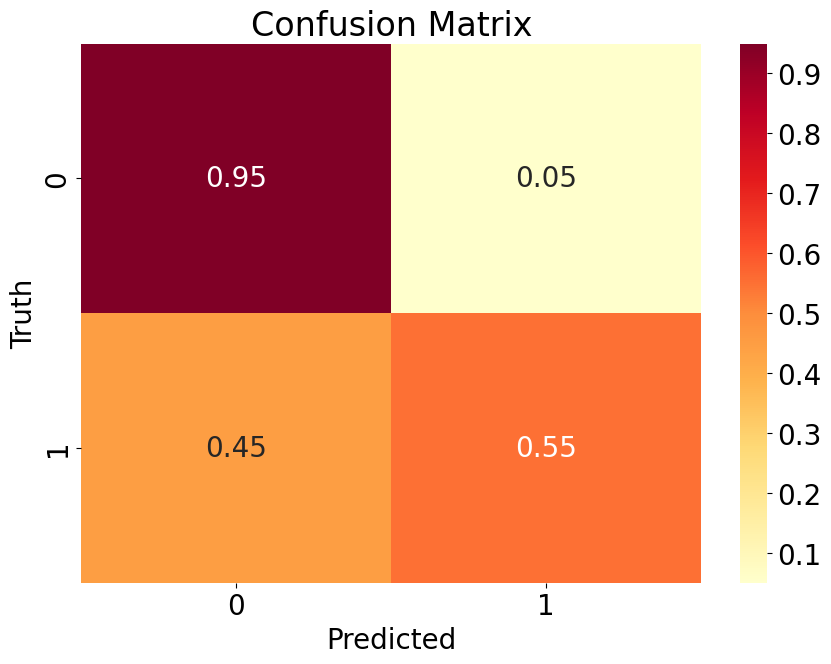

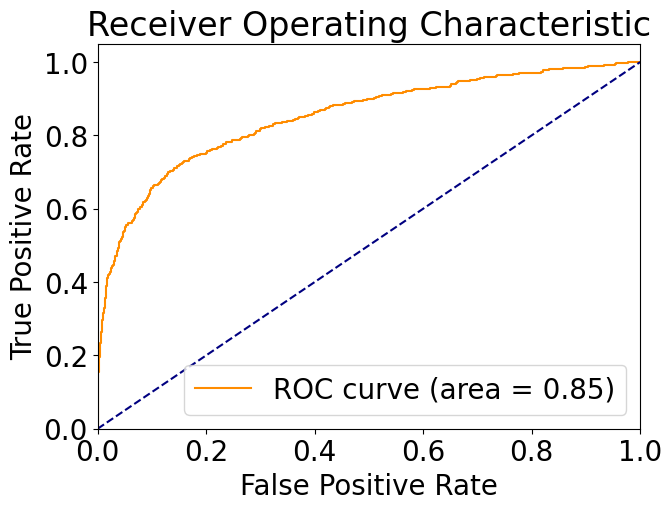

In [49]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the MLP model
num_train_epochs = 15
model, train_losses, validation_losses = run_MLP(
    X_train, X_test, y_train, y_test, batch_size=100, 
    learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

# Plot train and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(num_train_epochs), train_losses, label='Train')
plt.plot(range(num_train_epochs), validation_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Test Loss')
plt.show()

# Predict probabilities for the test data
probs = model.predict_proba(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(cm)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# one-time AUC and cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

# Set global font size
plt.rcParams.update({'font.size': 20})

# Normalize the confusion matrix
cm_normalized = normalize(cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

5-fold

train_loss 0.751 validation_loss 0.537
train_loss 0.278 validation_loss 0.354
train_loss 0.139 validation_loss 0.349
train_loss 0.093 validation_loss 0.354
train_loss 0.056 validation_loss 0.384
train_loss 0.05 validation_loss 0.426
train_loss 0.043 validation_loss 0.444
train_loss 0.043 validation_loss 0.475
train_loss 0.039 validation_loss 0.451
train_loss 0.044 validation_loss 0.49
train_loss 0.032 validation_loss 0.517
train_loss 0.026 validation_loss 0.531
train_loss 0.028 validation_loss 0.528
train_loss 0.028 validation_loss 0.545
train_loss 0.019 validation_loss 0.52


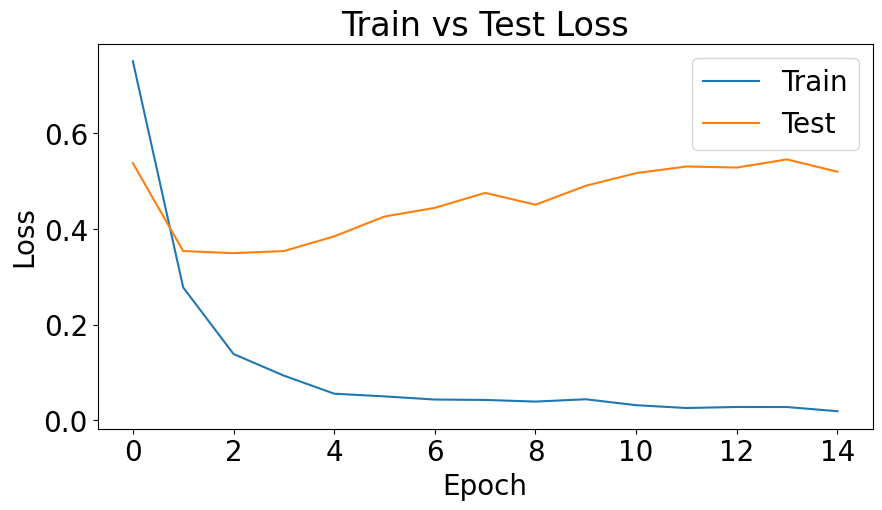

train_loss 0.685 validation_loss 0.521
train_loss 0.256 validation_loss 0.333
train_loss 0.129 validation_loss 0.365
train_loss 0.079 validation_loss 0.368
train_loss 0.064 validation_loss 0.388
train_loss 0.057 validation_loss 0.422
train_loss 0.038 validation_loss 0.465
train_loss 0.031 validation_loss 0.48
train_loss 0.035 validation_loss 0.518
train_loss 0.031 validation_loss 0.51
train_loss 0.038 validation_loss 0.495
train_loss 0.031 validation_loss 0.514
train_loss 0.019 validation_loss 0.563
train_loss 0.024 validation_loss 0.573
train_loss 0.025 validation_loss 0.548


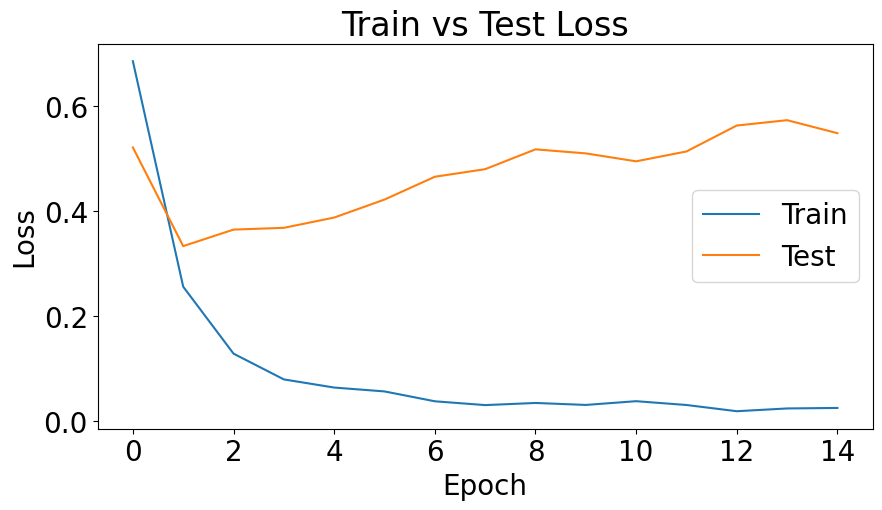

train_loss 0.73 validation_loss 0.54
train_loss 0.242 validation_loss 0.315
train_loss 0.119 validation_loss 0.297
train_loss 0.075 validation_loss 0.337
train_loss 0.054 validation_loss 0.34
train_loss 0.044 validation_loss 0.346
train_loss 0.049 validation_loss 0.398
train_loss 0.056 validation_loss 0.399
train_loss 0.038 validation_loss 0.443
train_loss 0.024 validation_loss 0.425
train_loss 0.027 validation_loss 0.441
train_loss 0.034 validation_loss 0.431
train_loss 0.031 validation_loss 0.448
train_loss 0.02 validation_loss 0.478
train_loss 0.023 validation_loss 0.476


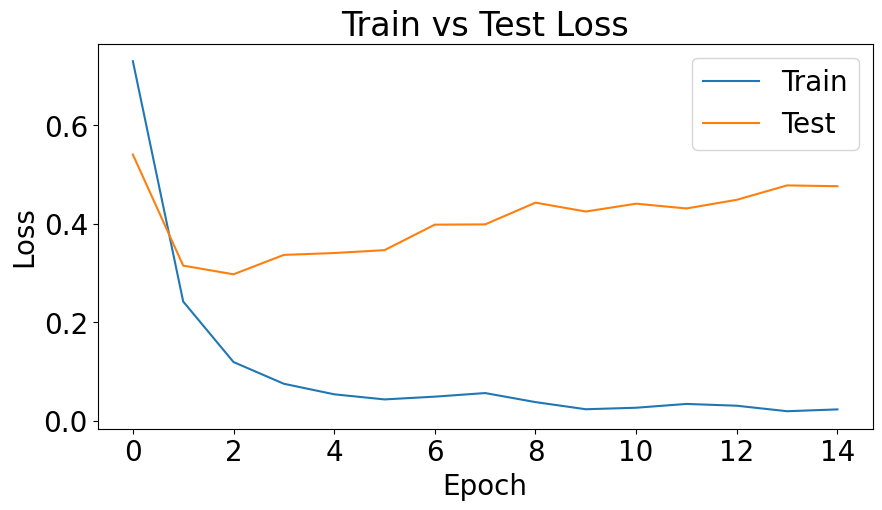

train_loss 0.76 validation_loss 0.402
train_loss 0.227 validation_loss 0.341
train_loss 0.117 validation_loss 0.323
train_loss 0.076 validation_loss 0.345
train_loss 0.053 validation_loss 0.362
train_loss 0.045 validation_loss 0.399
train_loss 0.047 validation_loss 0.416
train_loss 0.037 validation_loss 0.443
train_loss 0.033 validation_loss 0.444
train_loss 0.029 validation_loss 0.462
train_loss 0.032 validation_loss 0.454
train_loss 0.021 validation_loss 0.478
train_loss 0.03 validation_loss 0.492
train_loss 0.022 validation_loss 0.48
train_loss 0.025 validation_loss 0.482


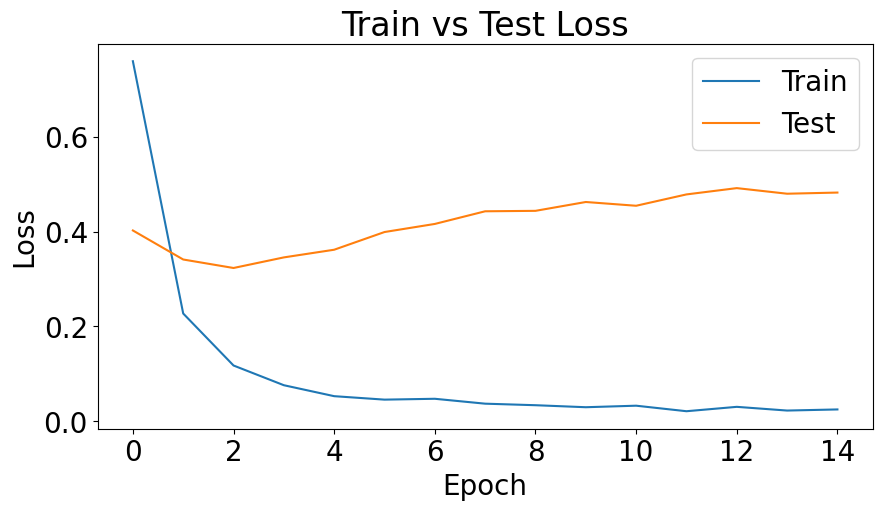

train_loss 0.728 validation_loss 0.523
train_loss 0.242 validation_loss 0.375
train_loss 0.126 validation_loss 0.404
train_loss 0.083 validation_loss 0.442
train_loss 0.055 validation_loss 0.507
train_loss 0.054 validation_loss 0.466
train_loss 0.056 validation_loss 0.498
train_loss 0.037 validation_loss 0.496
train_loss 0.028 validation_loss 0.511
train_loss 0.025 validation_loss 0.608
train_loss 0.038 validation_loss 0.548
train_loss 0.04 validation_loss 0.565
train_loss 0.033 validation_loss 0.627
train_loss 0.021 validation_loss 0.588
train_loss 0.02 validation_loss 0.563


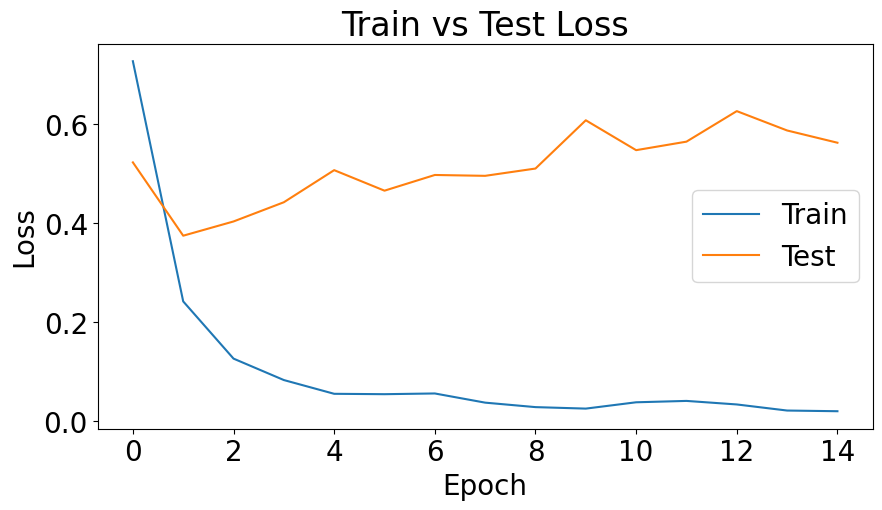

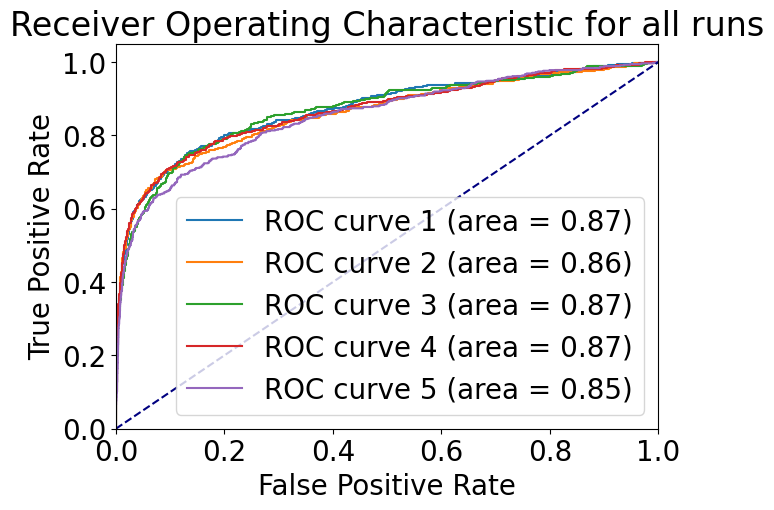

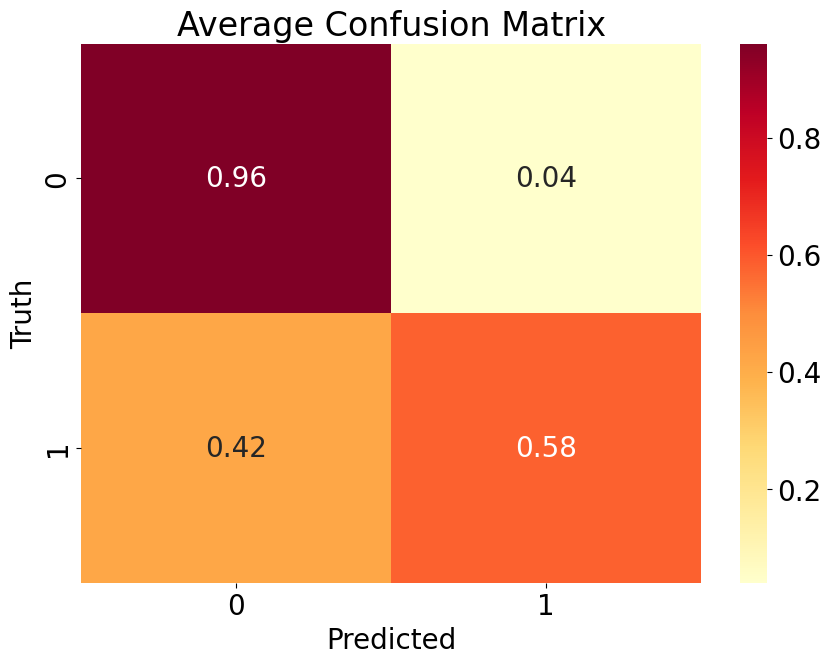

In [87]:
import random
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()

#### Features Ablation

100%|████████████████████████████████████████████████████| 30000/30000 [00:01<00:00, 20603.53it/s]


31690
train_loss 0.633 validation_loss 0.55
train_loss 0.526 validation_loss 0.356
train_loss 0.461 validation_loss 0.337
train_loss 0.419 validation_loss 0.323
train_loss 0.385 validation_loss 0.315
train_loss 0.355 validation_loss 0.303
train_loss 0.328 validation_loss 0.291
train_loss 0.303 validation_loss 0.28
train_loss 0.28 validation_loss 0.273
train_loss 0.258 validation_loss 0.268
train_loss 0.238 validation_loss 0.265
train_loss 0.218 validation_loss 0.259
train_loss 0.2 validation_loss 0.255
train_loss 0.183 validation_loss 0.252
train_loss 0.167 validation_loss 0.248


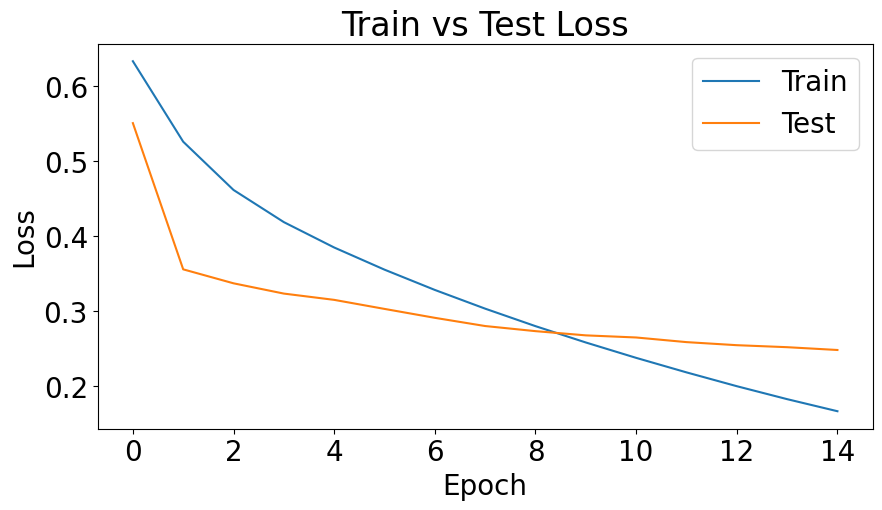

train_loss 0.64 validation_loss 0.535
train_loss 0.54 validation_loss 0.41
train_loss 0.471 validation_loss 0.413
train_loss 0.423 validation_loss 0.407
train_loss 0.386 validation_loss 0.394
train_loss 0.354 validation_loss 0.381
train_loss 0.326 validation_loss 0.373
train_loss 0.301 validation_loss 0.369
train_loss 0.277 validation_loss 0.363
train_loss 0.255 validation_loss 0.358
train_loss 0.235 validation_loss 0.351
train_loss 0.216 validation_loss 0.344
train_loss 0.198 validation_loss 0.34
train_loss 0.181 validation_loss 0.336
train_loss 0.165 validation_loss 0.333


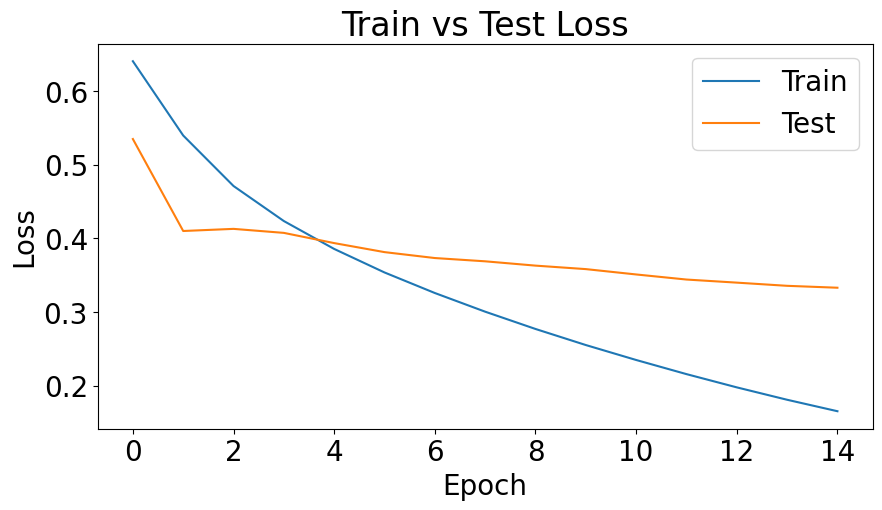

train_loss 0.635 validation_loss 0.614
train_loss 0.533 validation_loss 0.436
train_loss 0.471 validation_loss 0.413
train_loss 0.428 validation_loss 0.411
train_loss 0.393 validation_loss 0.406
train_loss 0.362 validation_loss 0.386
train_loss 0.334 validation_loss 0.359
train_loss 0.308 validation_loss 0.338
train_loss 0.283 validation_loss 0.324
train_loss 0.26 validation_loss 0.308
train_loss 0.239 validation_loss 0.298
train_loss 0.219 validation_loss 0.287
train_loss 0.201 validation_loss 0.278
train_loss 0.184 validation_loss 0.27
train_loss 0.168 validation_loss 0.262


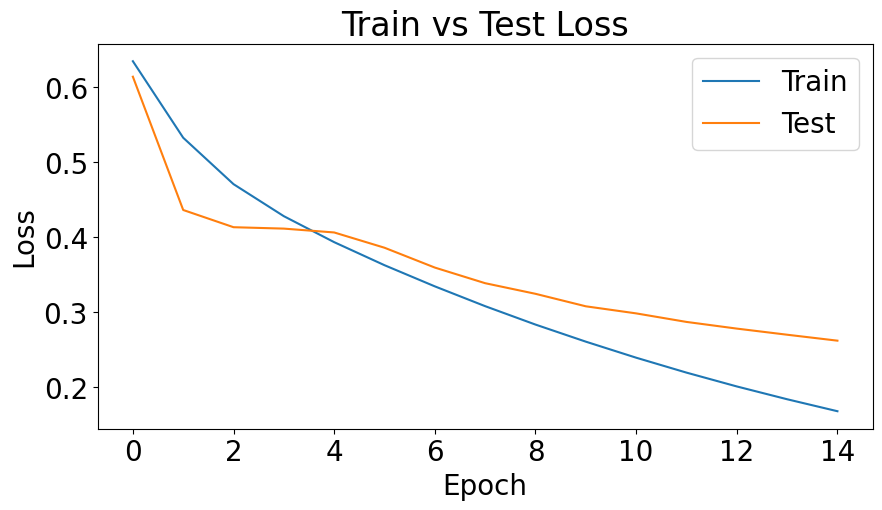

train_loss 0.629 validation_loss 0.627
train_loss 0.528 validation_loss 0.413
train_loss 0.469 validation_loss 0.37
train_loss 0.426 validation_loss 0.36
train_loss 0.392 validation_loss 0.363
train_loss 0.362 validation_loss 0.364
train_loss 0.335 validation_loss 0.359
train_loss 0.311 validation_loss 0.352
train_loss 0.288 validation_loss 0.341
train_loss 0.267 validation_loss 0.339
train_loss 0.246 validation_loss 0.333
train_loss 0.227 validation_loss 0.328
train_loss 0.21 validation_loss 0.321
train_loss 0.193 validation_loss 0.316
train_loss 0.177 validation_loss 0.307


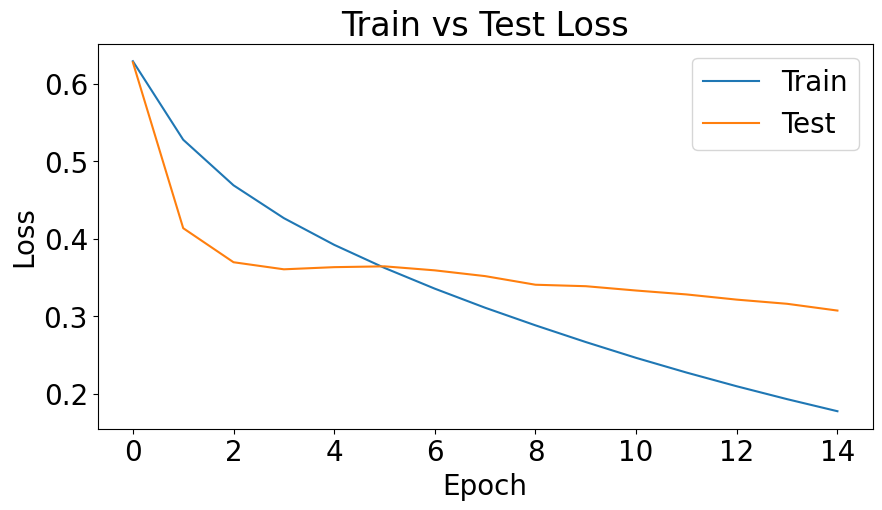

train_loss 0.632 validation_loss 0.605
train_loss 0.534 validation_loss 0.419
train_loss 0.475 validation_loss 0.369
train_loss 0.433 validation_loss 0.359
train_loss 0.397 validation_loss 0.351
train_loss 0.366 validation_loss 0.338
train_loss 0.337 validation_loss 0.317
train_loss 0.311 validation_loss 0.294
train_loss 0.287 validation_loss 0.281
train_loss 0.264 validation_loss 0.268
train_loss 0.242 validation_loss 0.258
train_loss 0.222 validation_loss 0.249
train_loss 0.203 validation_loss 0.239
train_loss 0.186 validation_loss 0.231
train_loss 0.169 validation_loss 0.223


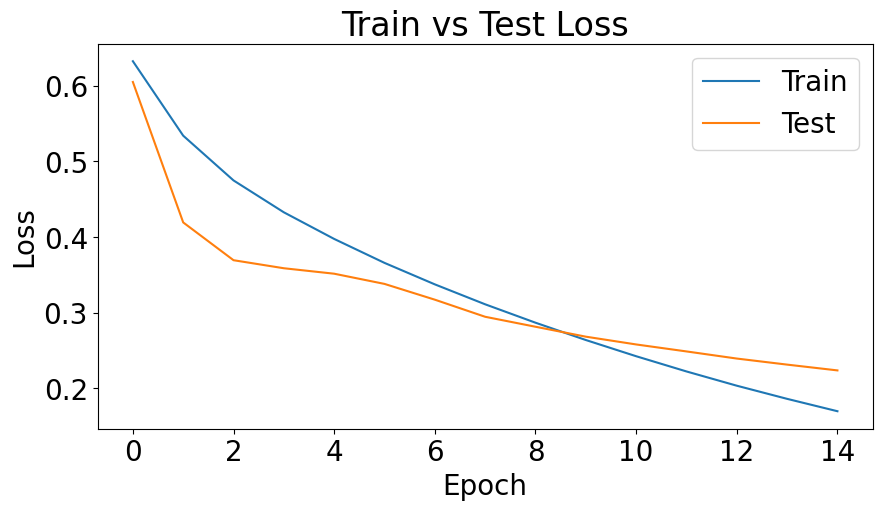

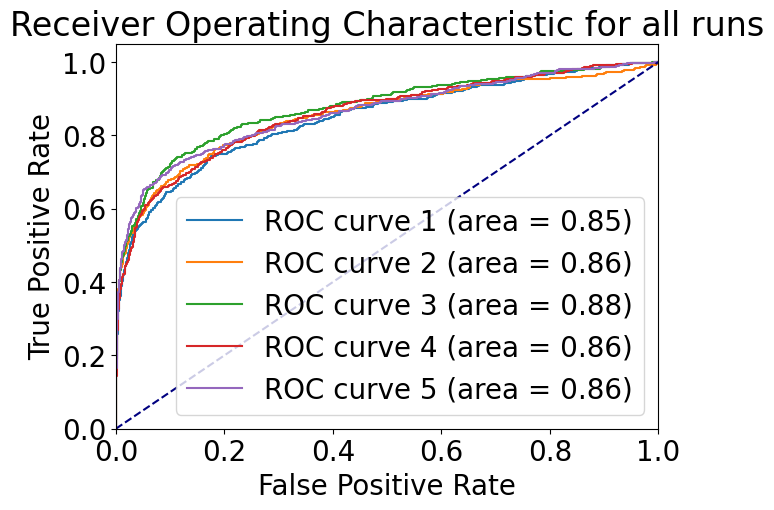

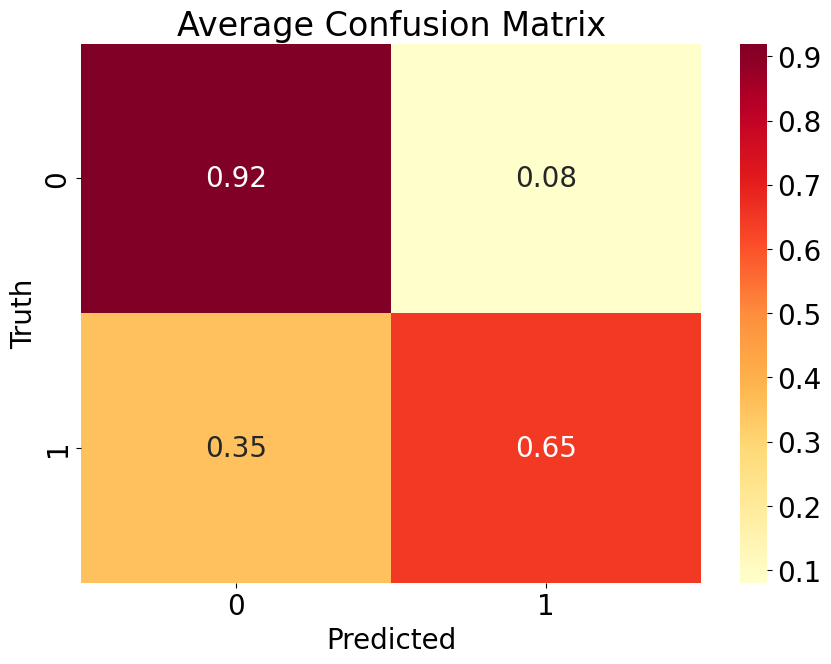

In [113]:
# D 0.862
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        


100%|████████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 36121.00it/s]


31690
train_loss 0.578 validation_loss 0.442
train_loss 0.435 validation_loss 0.39
train_loss 0.348 validation_loss 0.343
train_loss 0.286 validation_loss 0.303
train_loss 0.237 validation_loss 0.274
train_loss 0.197 validation_loss 0.252
train_loss 0.164 validation_loss 0.238
train_loss 0.137 validation_loss 0.227
train_loss 0.115 validation_loss 0.219
train_loss 0.097 validation_loss 0.215
train_loss 0.081 validation_loss 0.212
train_loss 0.069 validation_loss 0.212
train_loss 0.058 validation_loss 0.212
train_loss 0.049 validation_loss 0.214
train_loss 0.042 validation_loss 0.217


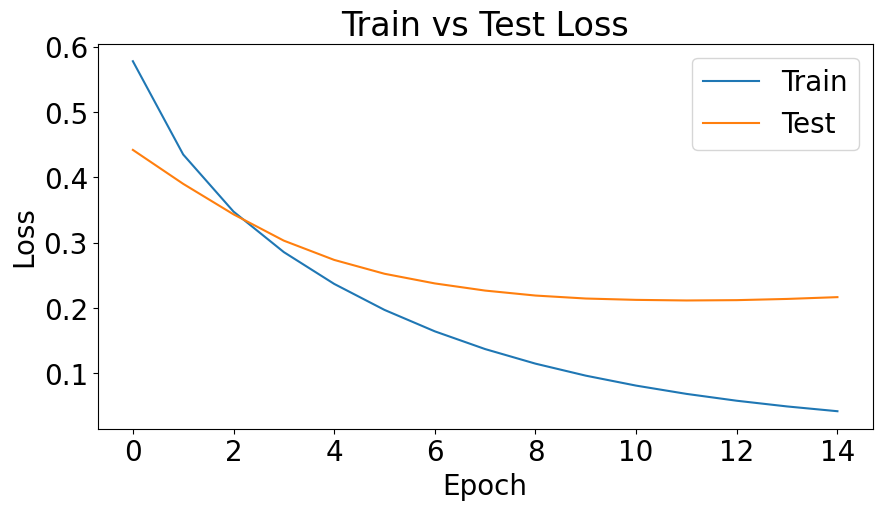

train_loss 0.574 validation_loss 0.445
train_loss 0.425 validation_loss 0.382
train_loss 0.339 validation_loss 0.345
train_loss 0.279 validation_loss 0.318
train_loss 0.231 validation_loss 0.294
train_loss 0.192 validation_loss 0.274
train_loss 0.16 validation_loss 0.257
train_loss 0.134 validation_loss 0.245
train_loss 0.112 validation_loss 0.236
train_loss 0.095 validation_loss 0.231
train_loss 0.08 validation_loss 0.229
train_loss 0.068 validation_loss 0.229
train_loss 0.058 validation_loss 0.231
train_loss 0.049 validation_loss 0.234
train_loss 0.042 validation_loss 0.238


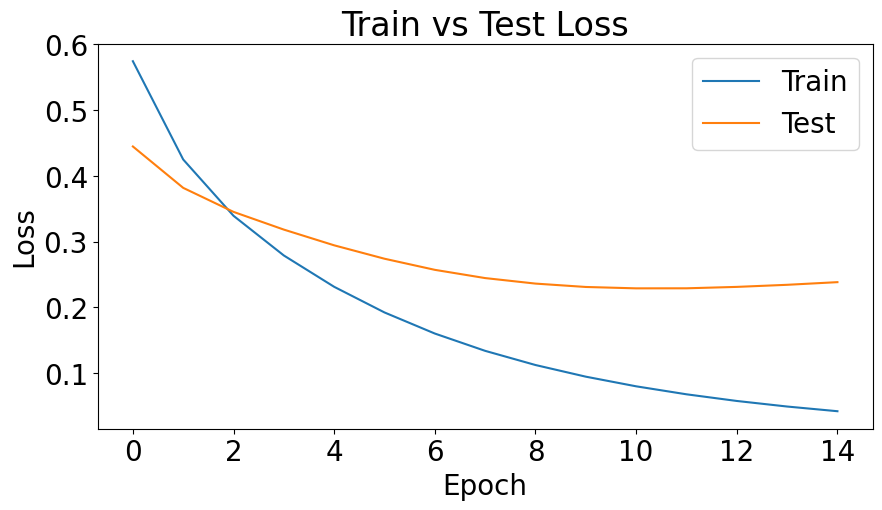

train_loss 0.576 validation_loss 0.459
train_loss 0.43 validation_loss 0.387
train_loss 0.344 validation_loss 0.349
train_loss 0.283 validation_loss 0.317
train_loss 0.235 validation_loss 0.291
train_loss 0.196 validation_loss 0.268
train_loss 0.164 validation_loss 0.25
train_loss 0.138 validation_loss 0.237
train_loss 0.116 validation_loss 0.228
train_loss 0.098 validation_loss 0.222
train_loss 0.083 validation_loss 0.219
train_loss 0.07 validation_loss 0.218
train_loss 0.06 validation_loss 0.219
train_loss 0.051 validation_loss 0.222
train_loss 0.043 validation_loss 0.226


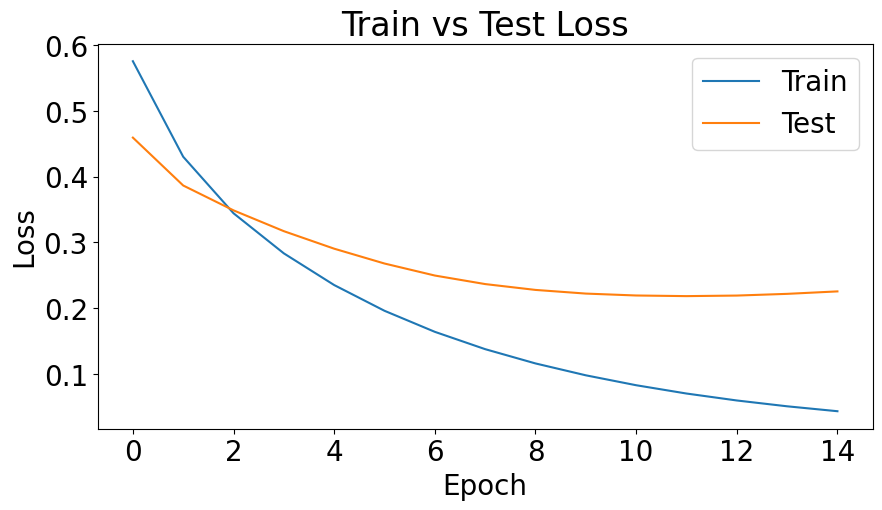

train_loss 0.576 validation_loss 0.456
train_loss 0.433 validation_loss 0.374
train_loss 0.348 validation_loss 0.333
train_loss 0.288 validation_loss 0.302
train_loss 0.241 validation_loss 0.275
train_loss 0.202 validation_loss 0.253
train_loss 0.171 validation_loss 0.235
train_loss 0.144 validation_loss 0.219
train_loss 0.122 validation_loss 0.208
train_loss 0.104 validation_loss 0.2
train_loss 0.088 validation_loss 0.194
train_loss 0.075 validation_loss 0.192
train_loss 0.064 validation_loss 0.191
train_loss 0.054 validation_loss 0.192
train_loss 0.047 validation_loss 0.194


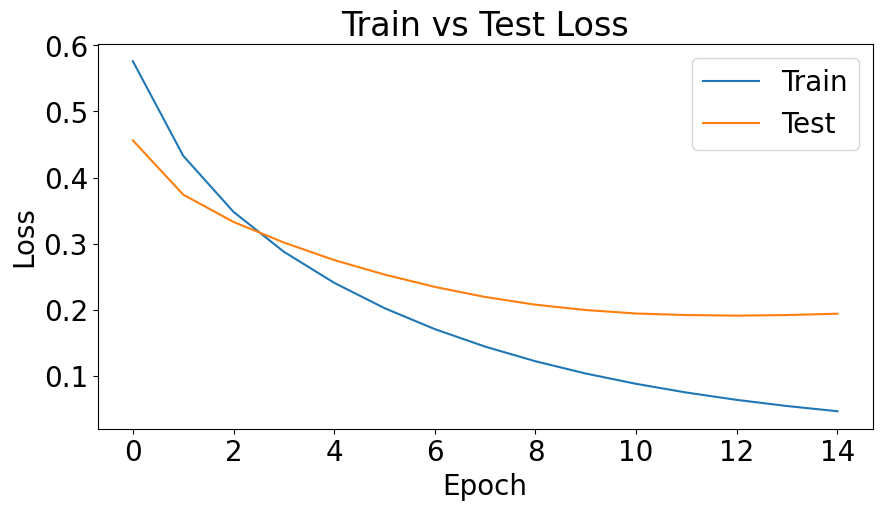

train_loss 0.578 validation_loss 0.467
train_loss 0.431 validation_loss 0.388
train_loss 0.344 validation_loss 0.342
train_loss 0.284 validation_loss 0.315
train_loss 0.236 validation_loss 0.293
train_loss 0.198 validation_loss 0.274
train_loss 0.166 validation_loss 0.259
train_loss 0.139 validation_loss 0.249
train_loss 0.118 validation_loss 0.241
train_loss 0.1 validation_loss 0.235
train_loss 0.085 validation_loss 0.232
train_loss 0.072 validation_loss 0.231
train_loss 0.061 validation_loss 0.23
train_loss 0.052 validation_loss 0.231
train_loss 0.045 validation_loss 0.233


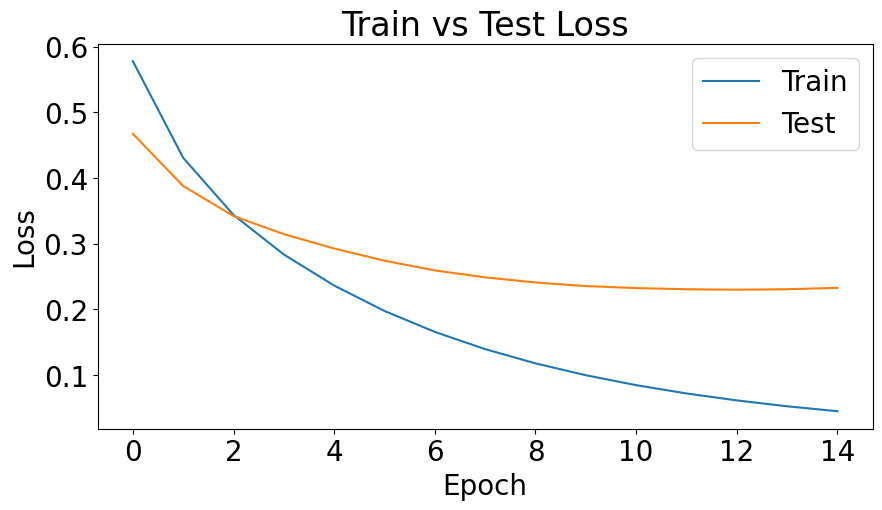

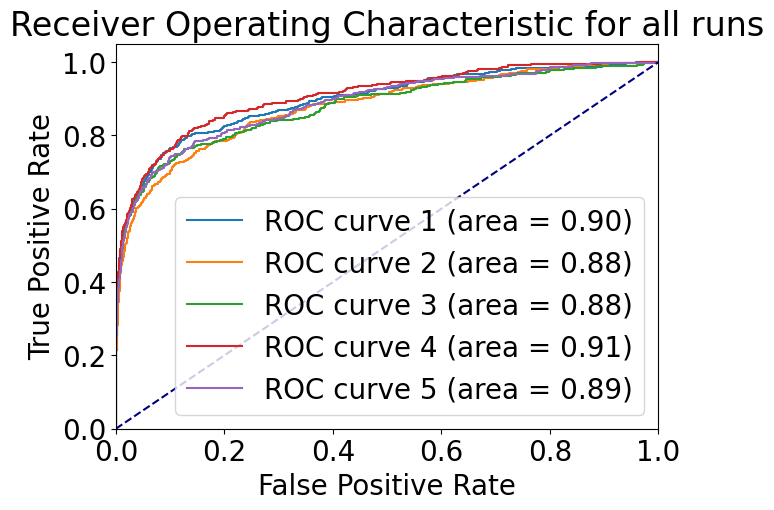

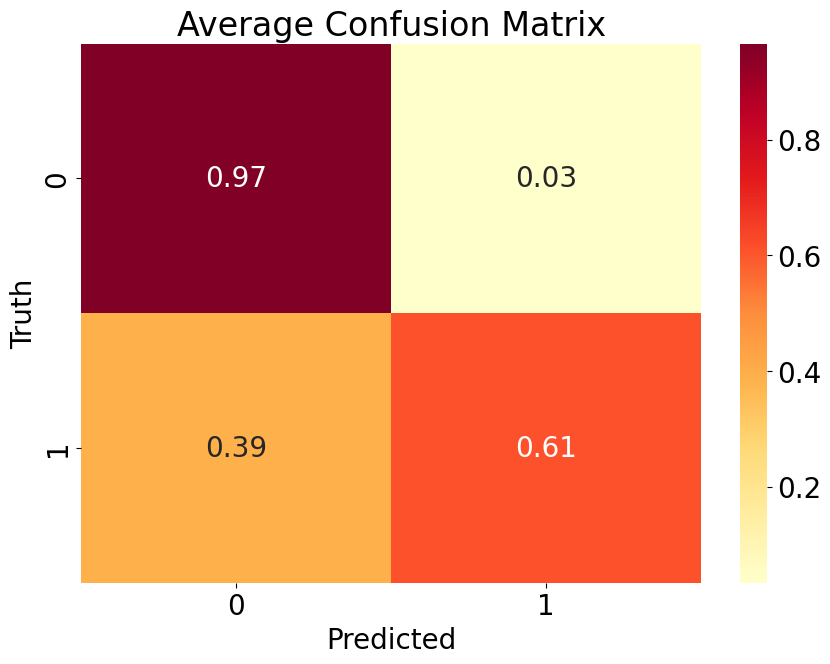

In [114]:
# P 0.892
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([c,d]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([c,d]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        

100%|█████████████████████████████████████████████████████| 30000/30000 [00:09<00:00, 3217.94it/s]


31690
train_loss 0.872 validation_loss 0.476
train_loss 0.282 validation_loss 0.486
train_loss 0.164 validation_loss 0.393
train_loss 0.104 validation_loss 0.415
train_loss 0.069 validation_loss 0.453
train_loss 0.059 validation_loss 0.416
train_loss 0.049 validation_loss 0.466
train_loss 0.043 validation_loss 0.485
train_loss 0.042 validation_loss 0.477
train_loss 0.03 validation_loss 0.529
train_loss 0.028 validation_loss 0.484
train_loss 0.033 validation_loss 0.517
train_loss 0.029 validation_loss 0.497
train_loss 0.021 validation_loss 0.488
train_loss 0.026 validation_loss 0.524


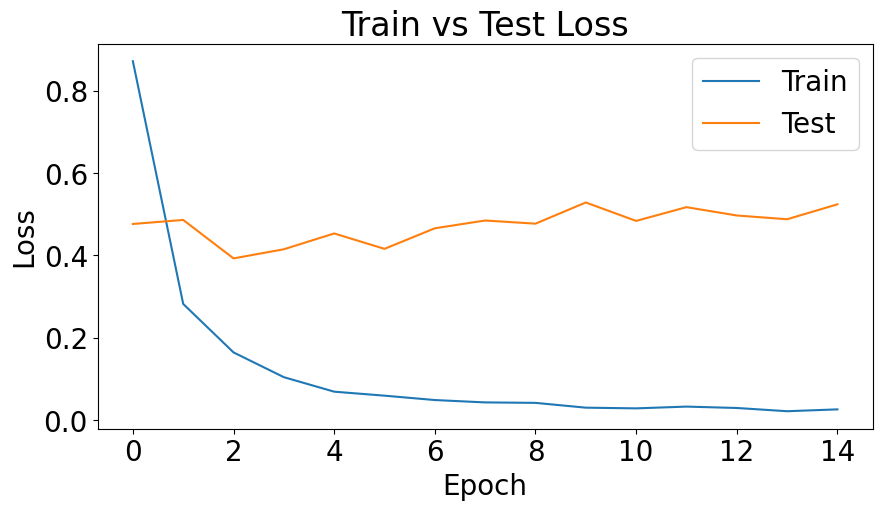

train_loss 0.837 validation_loss 0.403
train_loss 0.243 validation_loss 0.34
train_loss 0.134 validation_loss 0.332
train_loss 0.087 validation_loss 0.341
train_loss 0.056 validation_loss 0.372
train_loss 0.047 validation_loss 0.402
train_loss 0.036 validation_loss 0.392
train_loss 0.036 validation_loss 0.393
train_loss 0.043 validation_loss 0.392
train_loss 0.033 validation_loss 0.433
train_loss 0.027 validation_loss 0.421
train_loss 0.027 validation_loss 0.479
train_loss 0.026 validation_loss 0.438
train_loss 0.023 validation_loss 0.455
train_loss 0.023 validation_loss 0.494


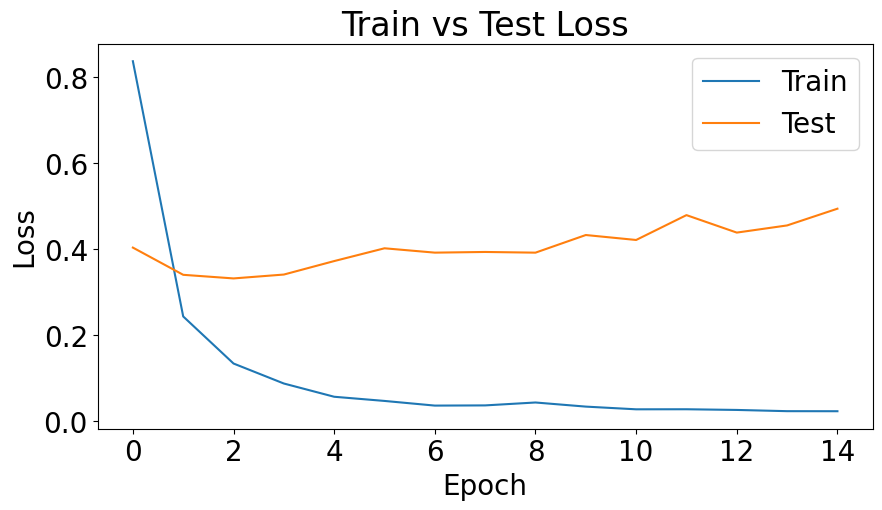

train_loss 0.859 validation_loss 0.499
train_loss 0.301 validation_loss 0.437
train_loss 0.171 validation_loss 0.43
train_loss 0.101 validation_loss 0.41
train_loss 0.067 validation_loss 0.442
train_loss 0.049 validation_loss 0.434
train_loss 0.037 validation_loss 0.503
train_loss 0.046 validation_loss 0.532
train_loss 0.036 validation_loss 0.496
train_loss 0.035 validation_loss 0.504
train_loss 0.036 validation_loss 0.508
train_loss 0.032 validation_loss 0.513
train_loss 0.03 validation_loss 0.573
train_loss 0.018 validation_loss 0.526
train_loss 0.024 validation_loss 0.544


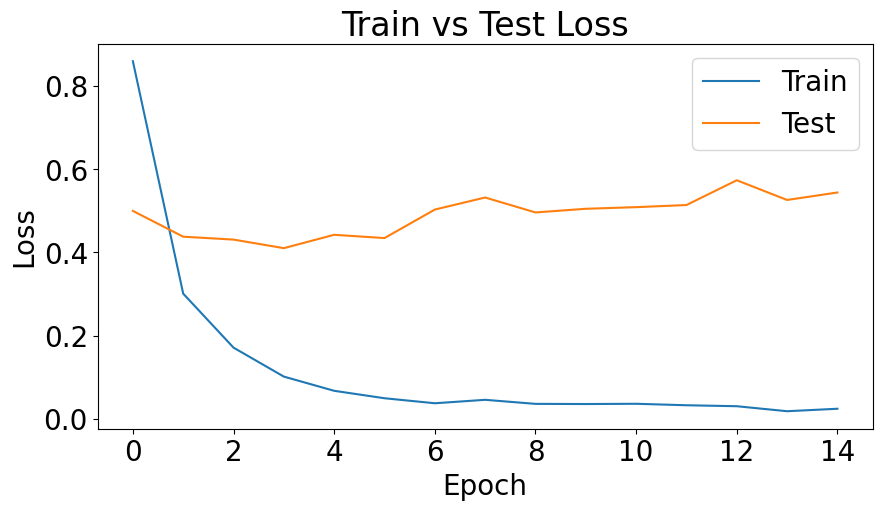

train_loss 0.886 validation_loss 0.511
train_loss 0.294 validation_loss 0.426
train_loss 0.165 validation_loss 0.436
train_loss 0.1 validation_loss 0.417
train_loss 0.067 validation_loss 0.436
train_loss 0.048 validation_loss 0.487
train_loss 0.054 validation_loss 0.539
train_loss 0.039 validation_loss 0.496
train_loss 0.036 validation_loss 0.496
train_loss 0.033 validation_loss 0.51
train_loss 0.027 validation_loss 0.547
train_loss 0.029 validation_loss 0.532
train_loss 0.029 validation_loss 0.575
train_loss 0.028 validation_loss 0.528
train_loss 0.028 validation_loss 0.59


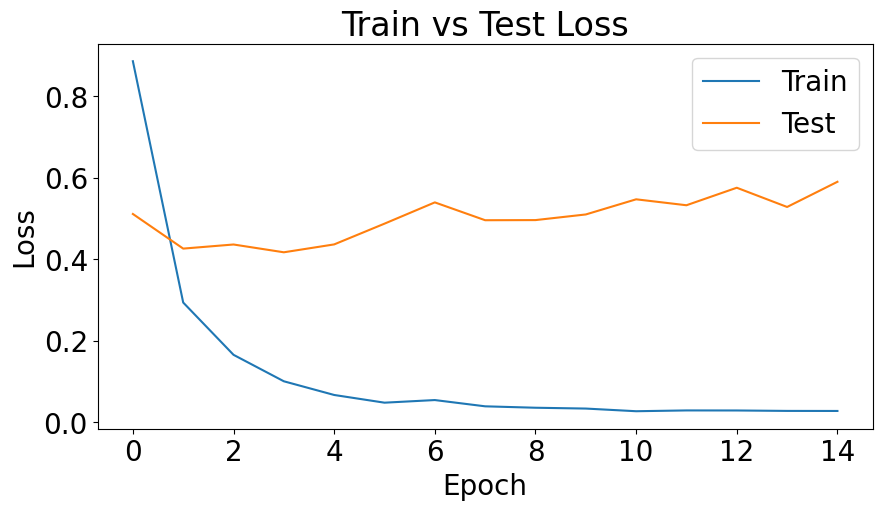

train_loss 0.878 validation_loss 0.479
train_loss 0.222 validation_loss 0.446
train_loss 0.111 validation_loss 0.446
train_loss 0.069 validation_loss 0.478
train_loss 0.05 validation_loss 0.449
train_loss 0.044 validation_loss 0.498
train_loss 0.042 validation_loss 0.522
train_loss 0.045 validation_loss 0.516
train_loss 0.03 validation_loss 0.564
train_loss 0.031 validation_loss 0.519
train_loss 0.038 validation_loss 0.582
train_loss 0.024 validation_loss 0.599
train_loss 0.025 validation_loss 0.528
train_loss 0.02 validation_loss 0.612
train_loss 0.027 validation_loss 0.596


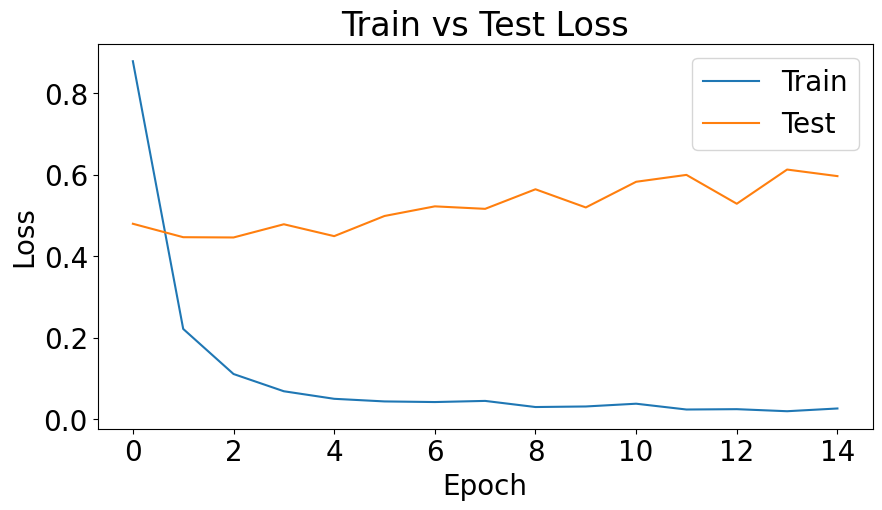

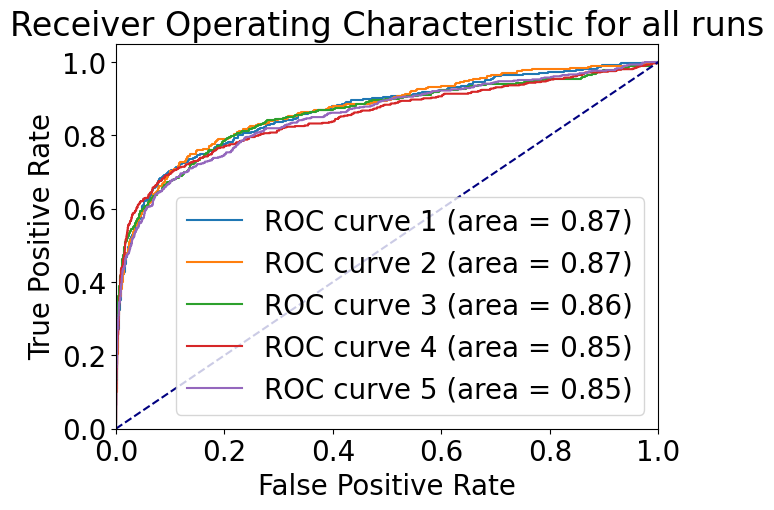

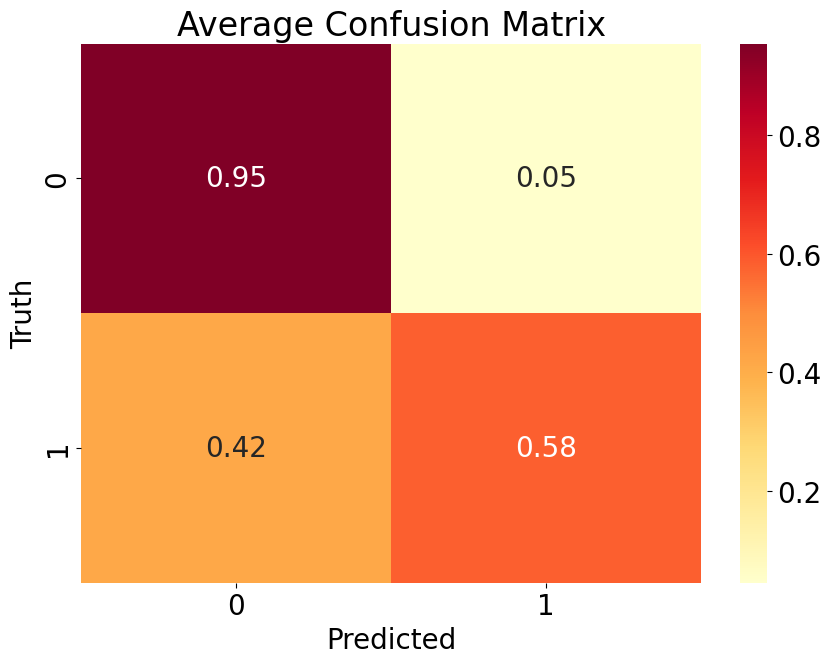

In [115]:
# S 0.860
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        

100%|████████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 58066.29it/s]


31690
train_loss 0.571 validation_loss 0.491
train_loss 0.424 validation_loss 0.381
train_loss 0.34 validation_loss 0.342
train_loss 0.282 validation_loss 0.312
train_loss 0.239 validation_loss 0.282
train_loss 0.204 validation_loss 0.253
train_loss 0.175 validation_loss 0.231
train_loss 0.151 validation_loss 0.215
train_loss 0.13 validation_loss 0.204
train_loss 0.112 validation_loss 0.197
train_loss 0.096 validation_loss 0.194
train_loss 0.083 validation_loss 0.192
train_loss 0.071 validation_loss 0.193
train_loss 0.061 validation_loss 0.196
train_loss 0.053 validation_loss 0.2


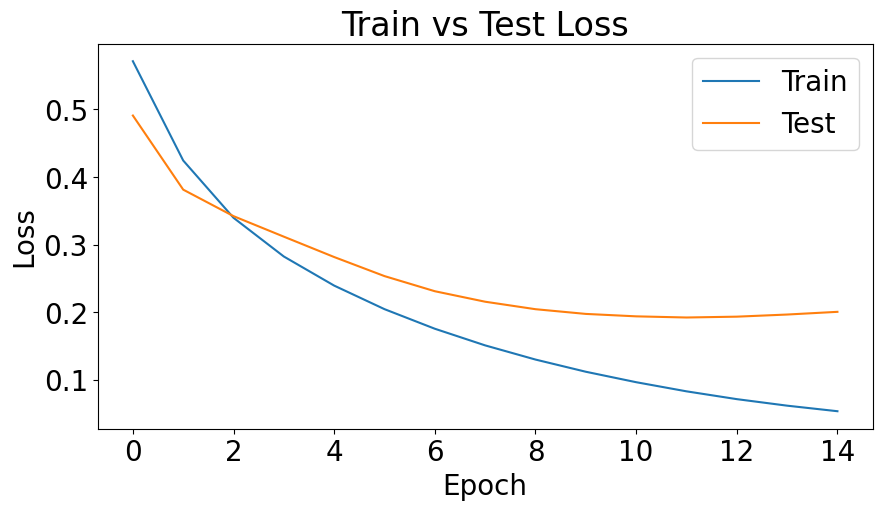

train_loss 0.576 validation_loss 0.516
train_loss 0.426 validation_loss 0.31
train_loss 0.344 validation_loss 0.282
train_loss 0.288 validation_loss 0.27
train_loss 0.246 validation_loss 0.259
train_loss 0.211 validation_loss 0.247
train_loss 0.181 validation_loss 0.237
train_loss 0.157 validation_loss 0.228
train_loss 0.135 validation_loss 0.221
train_loss 0.117 validation_loss 0.217
train_loss 0.101 validation_loss 0.215
train_loss 0.088 validation_loss 0.213
train_loss 0.076 validation_loss 0.214
train_loss 0.066 validation_loss 0.214
train_loss 0.058 validation_loss 0.215


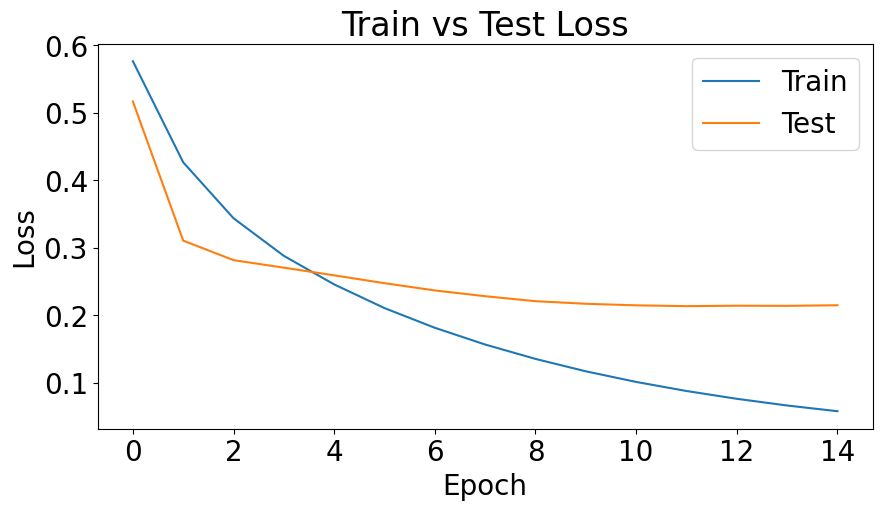

train_loss 0.571 validation_loss 0.478
train_loss 0.416 validation_loss 0.312
train_loss 0.328 validation_loss 0.281
train_loss 0.27 validation_loss 0.255
train_loss 0.226 validation_loss 0.234
train_loss 0.191 validation_loss 0.221
train_loss 0.162 validation_loss 0.213
train_loss 0.138 validation_loss 0.207
train_loss 0.118 validation_loss 0.205
train_loss 0.101 validation_loss 0.204
train_loss 0.086 validation_loss 0.205
train_loss 0.073 validation_loss 0.207
train_loss 0.063 validation_loss 0.21
train_loss 0.053 validation_loss 0.215
train_loss 0.046 validation_loss 0.221


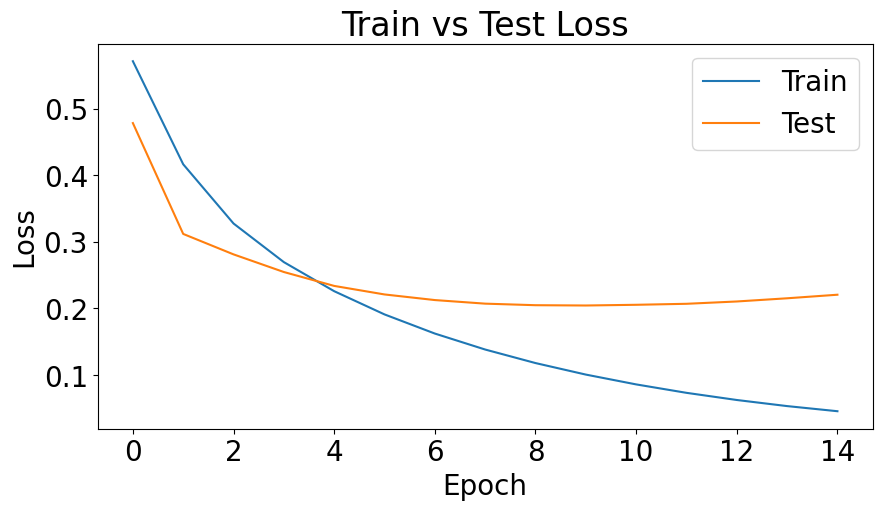

train_loss 0.577 validation_loss 0.463
train_loss 0.42 validation_loss 0.344
train_loss 0.333 validation_loss 0.302
train_loss 0.277 validation_loss 0.279
train_loss 0.234 validation_loss 0.26
train_loss 0.199 validation_loss 0.245
train_loss 0.169 validation_loss 0.232
train_loss 0.143 validation_loss 0.222
train_loss 0.121 validation_loss 0.214
train_loss 0.102 validation_loss 0.211
train_loss 0.087 validation_loss 0.21
train_loss 0.074 validation_loss 0.211
train_loss 0.063 validation_loss 0.214
train_loss 0.053 validation_loss 0.218
train_loss 0.046 validation_loss 0.222


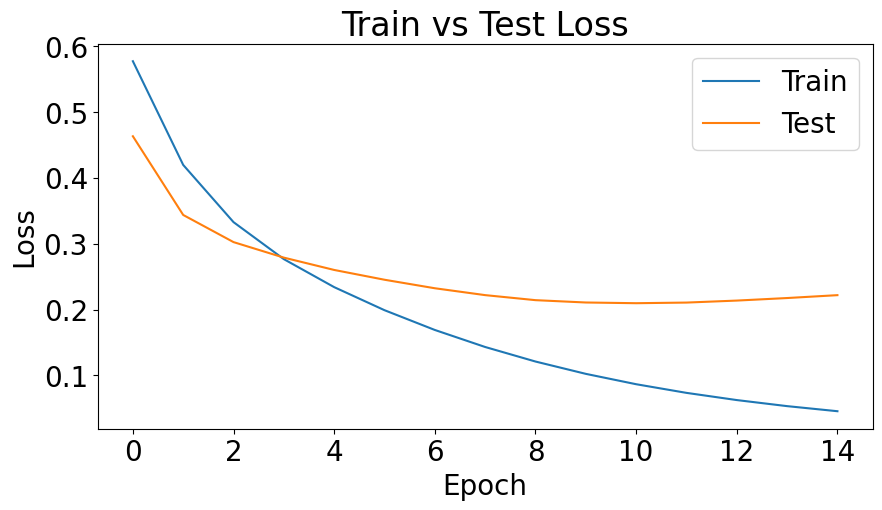

train_loss 0.568 validation_loss 0.427
train_loss 0.417 validation_loss 0.33
train_loss 0.332 validation_loss 0.305
train_loss 0.274 validation_loss 0.288
train_loss 0.229 validation_loss 0.268
train_loss 0.193 validation_loss 0.251
train_loss 0.163 validation_loss 0.239
train_loss 0.137 validation_loss 0.227
train_loss 0.115 validation_loss 0.221
train_loss 0.097 validation_loss 0.218
train_loss 0.082 validation_loss 0.216
train_loss 0.07 validation_loss 0.217
train_loss 0.06 validation_loss 0.22
train_loss 0.051 validation_loss 0.225
train_loss 0.044 validation_loss 0.23


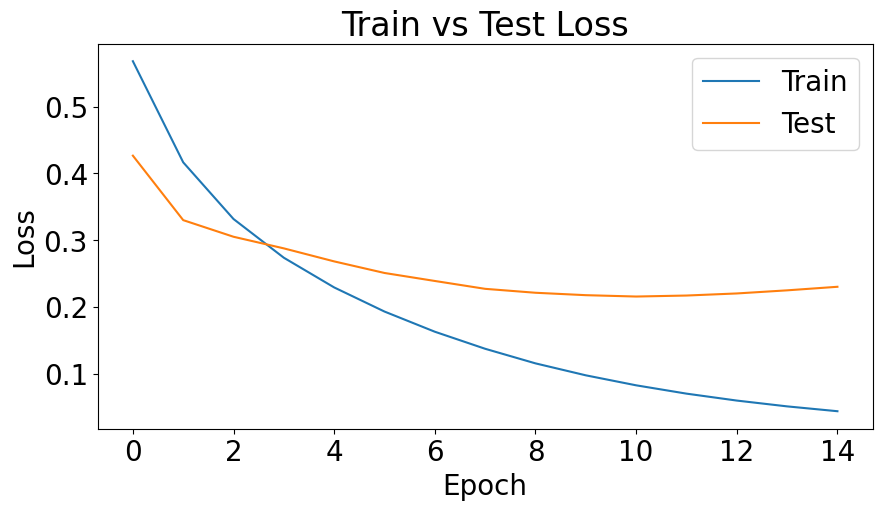

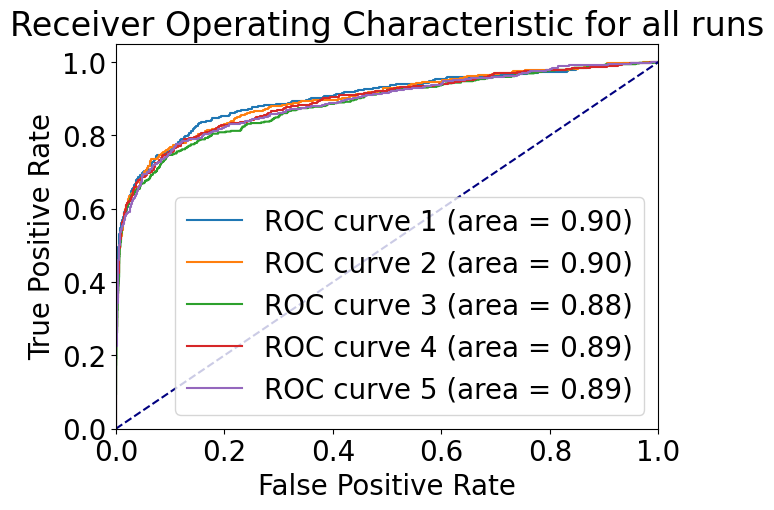

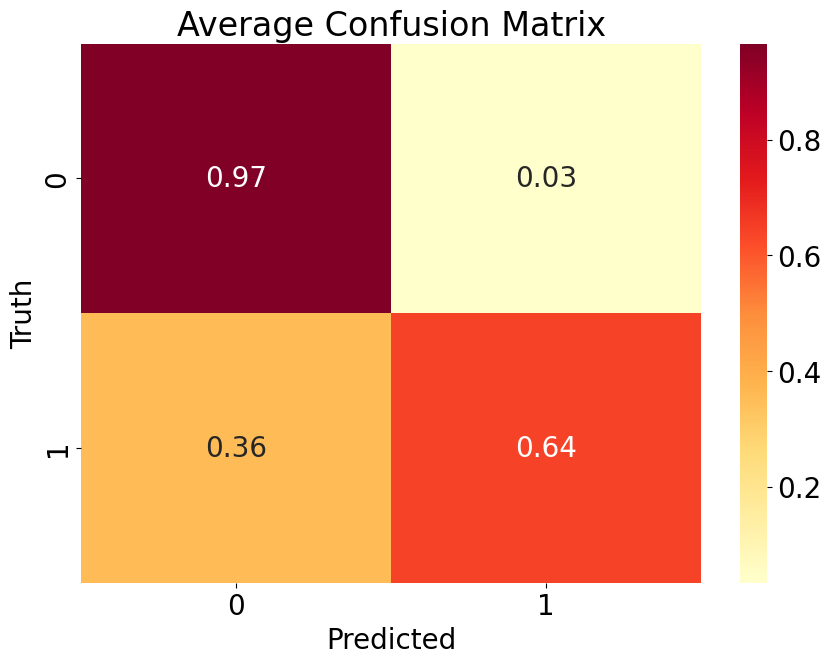

In [125]:
# DP 0.894
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        

In [126]:
cms

[array([[5601,  203],
        [ 177,  357]]),
 array([[5555,  259],
        [ 174,  350]]),
 array([[5662,  159],
        [ 193,  324]]),
 array([[5583,  169],
        [ 216,  370]]),
 array([[5546,  204],
        [ 217,  371]])]

In [127]:
import numpy as np

confusion_matrices = [
    np.array([[5601,  203], [ 177,  357]]),
    np.array([[5555,  259], [ 174,  350]]),
    np.array([[5662,  159], [ 193,  324]]),
    np.array([[5583,  169], [ 216,  370]]),
    np.array([[5546,  204], [ 217,  371]])
]

precisions = []
recalls = []
for cm in confusion_matrices:
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    precisions.append(precision)
    recalls.append(recall)

avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)

Average Precision:  0.6429387778281546
Average Recall:  0.6451044823957243


100%|█████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5411.09it/s]


31690
train_loss 0.974 validation_loss 0.467
train_loss 0.204 validation_loss 0.418
train_loss 0.102 validation_loss 0.414
train_loss 0.059 validation_loss 0.437
train_loss 0.046 validation_loss 0.46
train_loss 0.052 validation_loss 0.436
train_loss 0.038 validation_loss 0.454
train_loss 0.034 validation_loss 0.465
train_loss 0.038 validation_loss 0.485
train_loss 0.032 validation_loss 0.5
train_loss 0.028 validation_loss 0.463
train_loss 0.025 validation_loss 0.504
train_loss 0.037 validation_loss 0.493
train_loss 0.029 validation_loss 0.535
train_loss 0.027 validation_loss 0.522


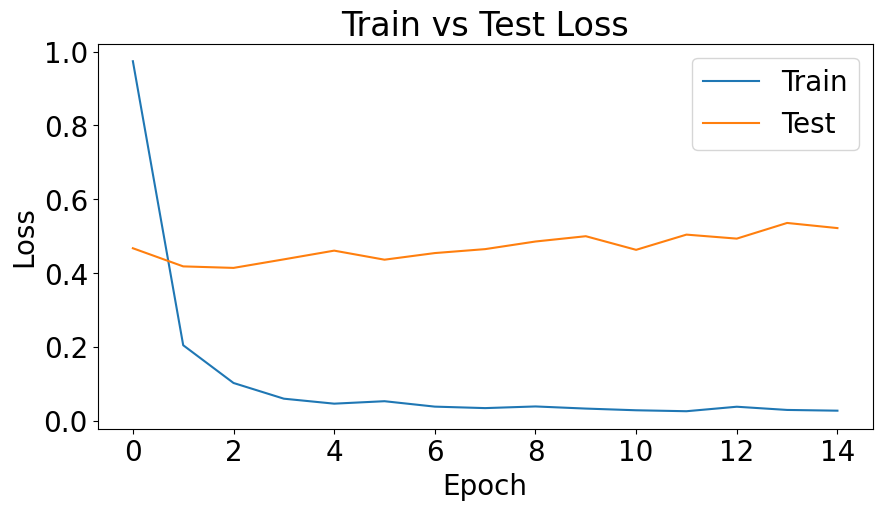

train_loss 0.982 validation_loss 0.546
train_loss 0.28 validation_loss 0.404
train_loss 0.162 validation_loss 0.412
train_loss 0.097 validation_loss 0.401
train_loss 0.072 validation_loss 0.447
train_loss 0.057 validation_loss 0.464
train_loss 0.049 validation_loss 0.483
train_loss 0.037 validation_loss 0.482
train_loss 0.035 validation_loss 0.491
train_loss 0.041 validation_loss 0.481
train_loss 0.032 validation_loss 0.507
train_loss 0.034 validation_loss 0.518
train_loss 0.022 validation_loss 0.506
train_loss 0.018 validation_loss 0.538
train_loss 0.026 validation_loss 0.59


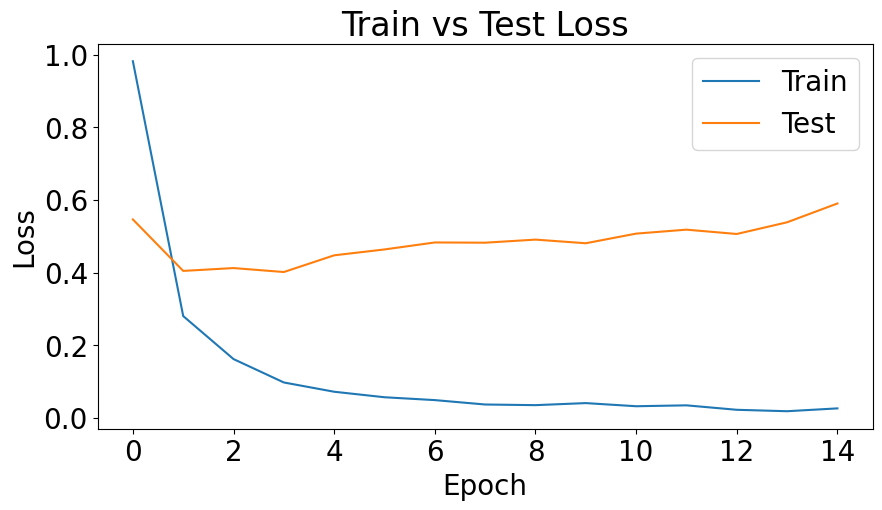

train_loss 0.972 validation_loss 0.485
train_loss 0.295 validation_loss 0.444
train_loss 0.167 validation_loss 0.39
train_loss 0.097 validation_loss 0.401
train_loss 0.067 validation_loss 0.396
train_loss 0.052 validation_loss 0.418
train_loss 0.034 validation_loss 0.44
train_loss 0.037 validation_loss 0.483
train_loss 0.044 validation_loss 0.482
train_loss 0.036 validation_loss 0.478
train_loss 0.026 validation_loss 0.492
train_loss 0.021 validation_loss 0.554
train_loss 0.033 validation_loss 0.516
train_loss 0.033 validation_loss 0.517
train_loss 0.023 validation_loss 0.525


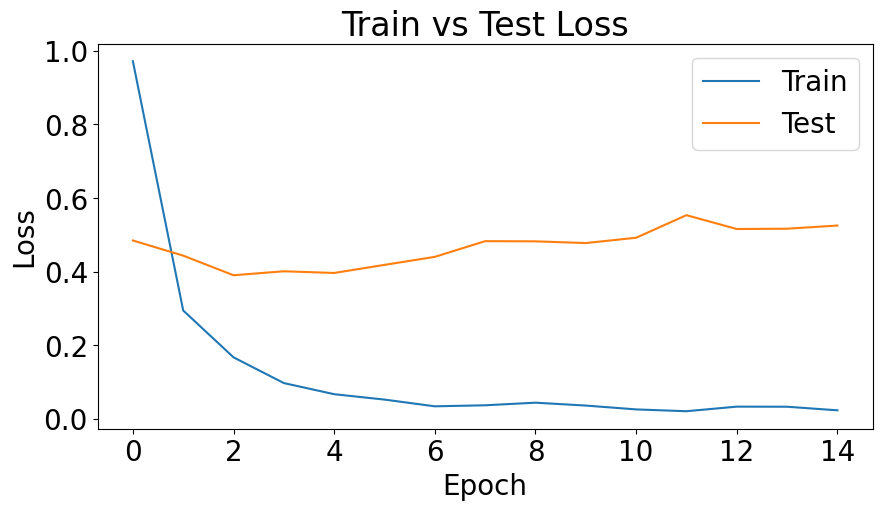

train_loss 0.884 validation_loss 0.516
train_loss 0.256 validation_loss 0.384
train_loss 0.134 validation_loss 0.369
train_loss 0.083 validation_loss 0.405
train_loss 0.056 validation_loss 0.426
train_loss 0.042 validation_loss 0.422
train_loss 0.032 validation_loss 0.41
train_loss 0.033 validation_loss 0.475
train_loss 0.038 validation_loss 0.472
train_loss 0.041 validation_loss 0.443
train_loss 0.029 validation_loss 0.495
train_loss 0.027 validation_loss 0.479
train_loss 0.021 validation_loss 0.505
train_loss 0.023 validation_loss 0.475
train_loss 0.032 validation_loss 0.509


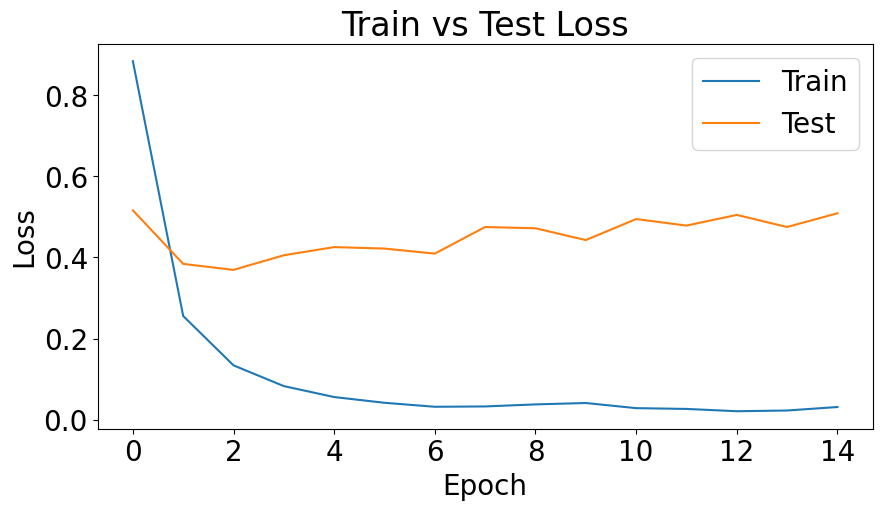

train_loss 0.887 validation_loss 0.469
train_loss 0.277 validation_loss 0.385
train_loss 0.146 validation_loss 0.404
train_loss 0.09 validation_loss 0.388
train_loss 0.056 validation_loss 0.44
train_loss 0.039 validation_loss 0.42
train_loss 0.033 validation_loss 0.462
train_loss 0.042 validation_loss 0.442
train_loss 0.032 validation_loss 0.447
train_loss 0.032 validation_loss 0.492
train_loss 0.028 validation_loss 0.522
train_loss 0.025 validation_loss 0.507
train_loss 0.032 validation_loss 0.486
train_loss 0.029 validation_loss 0.475
train_loss 0.022 validation_loss 0.548


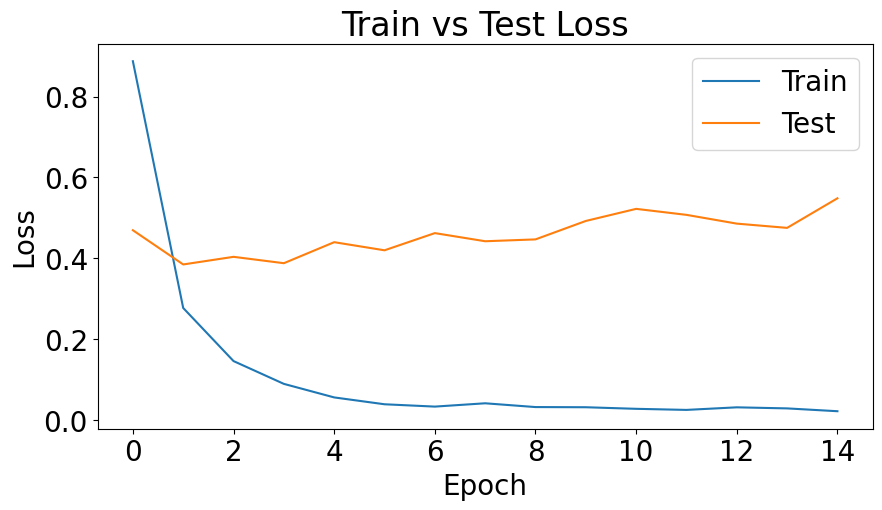

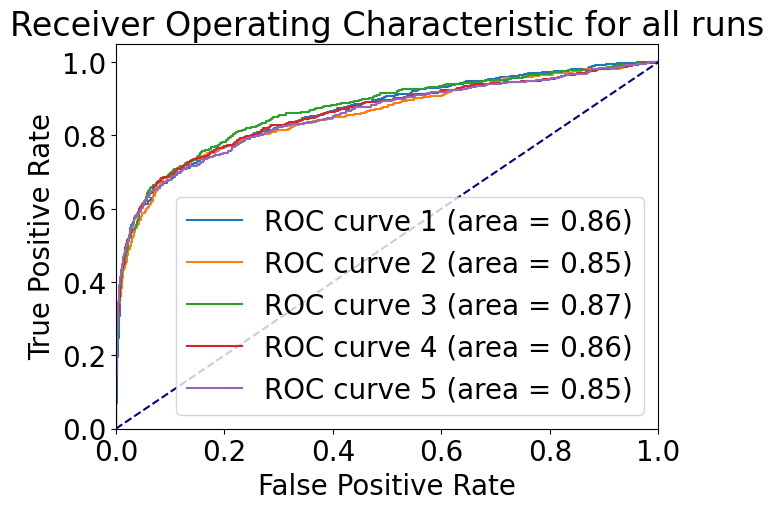

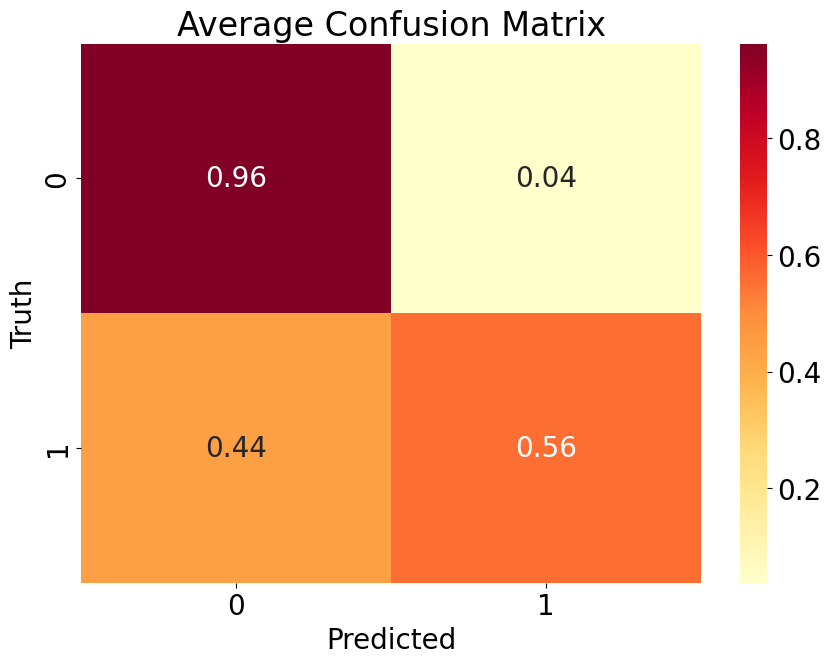

In [117]:
# DS 0.858
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        

100%|█████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5538.25it/s]


31690
train_loss 0.793 validation_loss 0.506
train_loss 0.354 validation_loss 0.392
train_loss 0.176 validation_loss 0.378
train_loss 0.098 validation_loss 0.382
train_loss 0.062 validation_loss 0.383
train_loss 0.049 validation_loss 0.427
train_loss 0.044 validation_loss 0.461
train_loss 0.033 validation_loss 0.462
train_loss 0.026 validation_loss 0.447
train_loss 0.034 validation_loss 0.469
train_loss 0.031 validation_loss 0.481
train_loss 0.024 validation_loss 0.524
train_loss 0.033 validation_loss 0.504
train_loss 0.029 validation_loss 0.511
train_loss 0.018 validation_loss 0.591


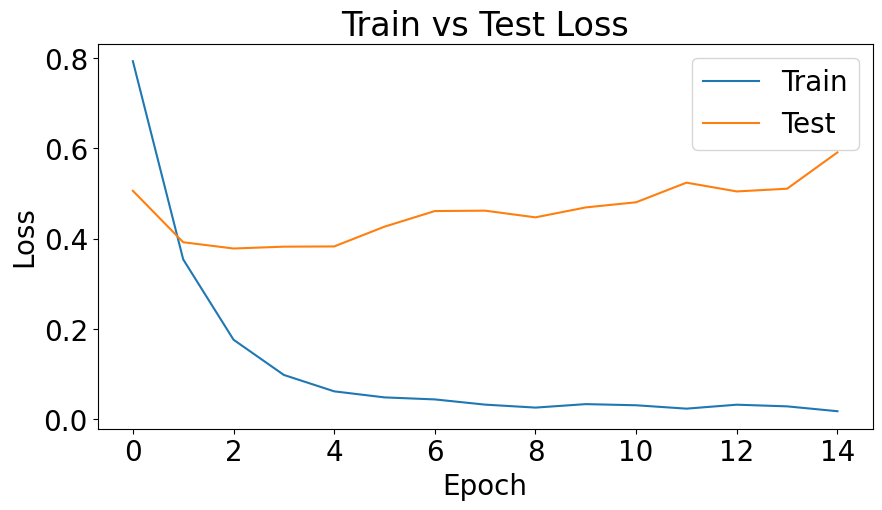

train_loss 0.808 validation_loss 0.52
train_loss 0.378 validation_loss 0.412
train_loss 0.187 validation_loss 0.399
train_loss 0.109 validation_loss 0.412
train_loss 0.073 validation_loss 0.426
train_loss 0.053 validation_loss 0.435
train_loss 0.04 validation_loss 0.462
train_loss 0.036 validation_loss 0.462
train_loss 0.04 validation_loss 0.503
train_loss 0.038 validation_loss 0.501
train_loss 0.032 validation_loss 0.502
train_loss 0.029 validation_loss 0.51
train_loss 0.019 validation_loss 0.601
train_loss 0.03 validation_loss 0.559
train_loss 0.028 validation_loss 0.595


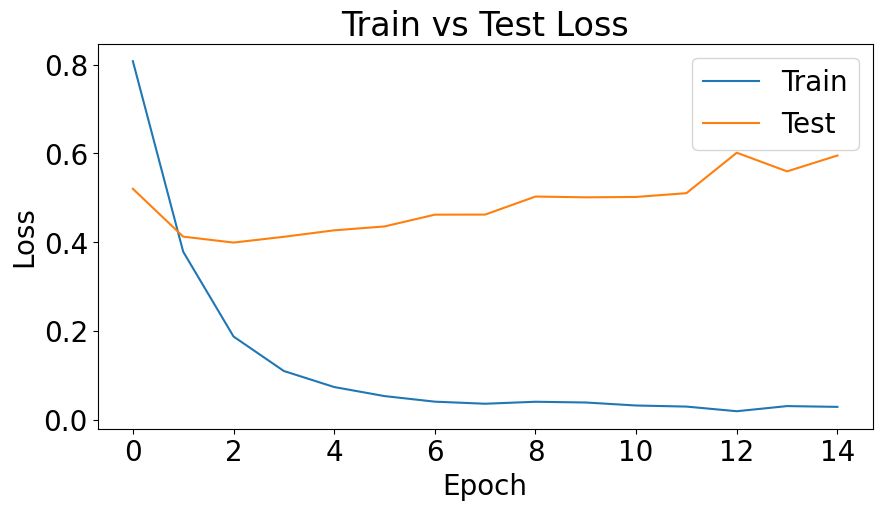

train_loss 0.79 validation_loss 0.505
train_loss 0.364 validation_loss 0.427
train_loss 0.184 validation_loss 0.421
train_loss 0.106 validation_loss 0.42
train_loss 0.071 validation_loss 0.484
train_loss 0.05 validation_loss 0.496
train_loss 0.039 validation_loss 0.569
train_loss 0.042 validation_loss 0.557
train_loss 0.042 validation_loss 0.506
train_loss 0.039 validation_loss 0.512
train_loss 0.024 validation_loss 0.537
train_loss 0.022 validation_loss 0.57
train_loss 0.03 validation_loss 0.557
train_loss 0.029 validation_loss 0.596
train_loss 0.024 validation_loss 0.565


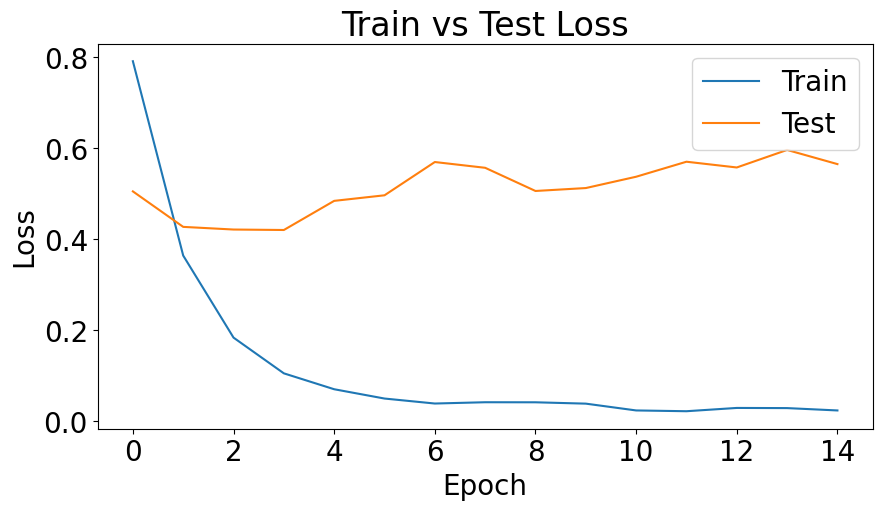

train_loss 0.825 validation_loss 0.465
train_loss 0.368 validation_loss 0.39
train_loss 0.186 validation_loss 0.356
train_loss 0.105 validation_loss 0.354
train_loss 0.073 validation_loss 0.375
train_loss 0.046 validation_loss 0.379
train_loss 0.043 validation_loss 0.421
train_loss 0.042 validation_loss 0.425
train_loss 0.036 validation_loss 0.469
train_loss 0.035 validation_loss 0.473
train_loss 0.028 validation_loss 0.491
train_loss 0.031 validation_loss 0.493
train_loss 0.019 validation_loss 0.523
train_loss 0.036 validation_loss 0.493
train_loss 0.023 validation_loss 0.526


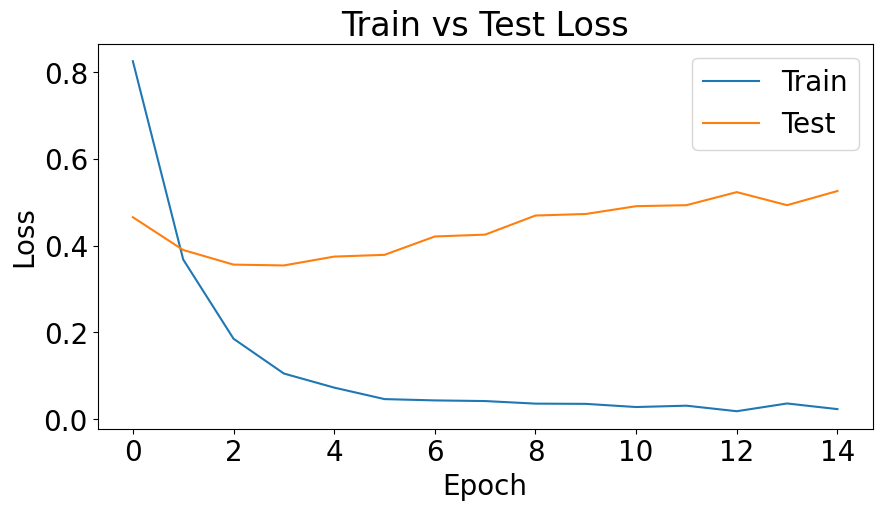

train_loss 0.821 validation_loss 0.463
train_loss 0.342 validation_loss 0.37
train_loss 0.193 validation_loss 0.338
train_loss 0.113 validation_loss 0.344
train_loss 0.077 validation_loss 0.367
train_loss 0.058 validation_loss 0.391
train_loss 0.045 validation_loss 0.413
train_loss 0.035 validation_loss 0.399
train_loss 0.039 validation_loss 0.427
train_loss 0.035 validation_loss 0.502
train_loss 0.034 validation_loss 0.535
train_loss 0.034 validation_loss 0.503
train_loss 0.03 validation_loss 0.479
train_loss 0.023 validation_loss 0.462
train_loss 0.02 validation_loss 0.541


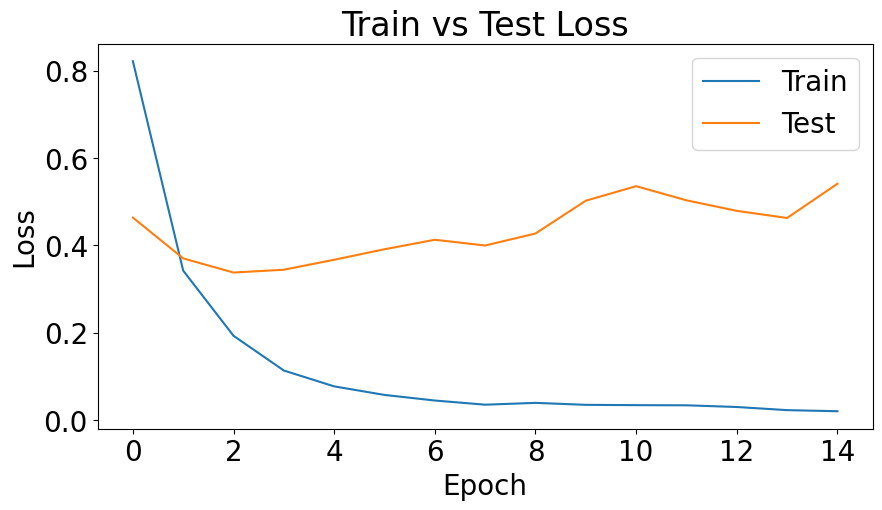

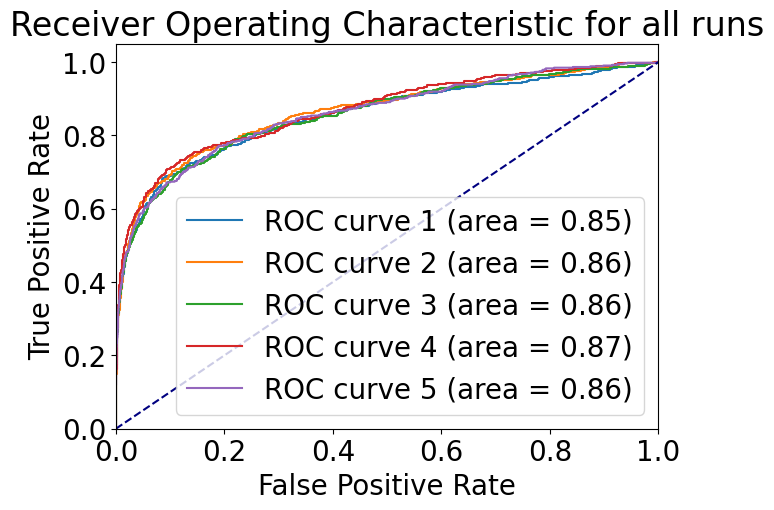

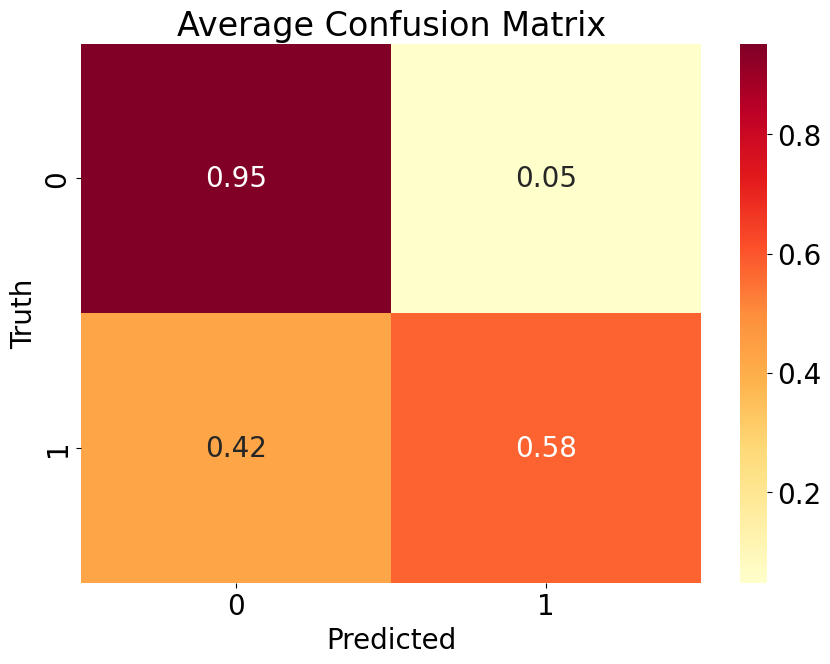

In [118]:
# PS 
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([c,d,e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([c,d,e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        

100%|█████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5285.04it/s]


31690
train_loss 0.714 validation_loss 0.5
train_loss 0.244 validation_loss 0.372
train_loss 0.123 validation_loss 0.387
train_loss 0.077 validation_loss 0.395
train_loss 0.052 validation_loss 0.444
train_loss 0.046 validation_loss 0.425
train_loss 0.05 validation_loss 0.454
train_loss 0.043 validation_loss 0.462
train_loss 0.028 validation_loss 0.523
train_loss 0.037 validation_loss 0.523
train_loss 0.033 validation_loss 0.501
train_loss 0.027 validation_loss 0.519
train_loss 0.022 validation_loss 0.542
train_loss 0.024 validation_loss 0.547
train_loss 0.025 validation_loss 0.553


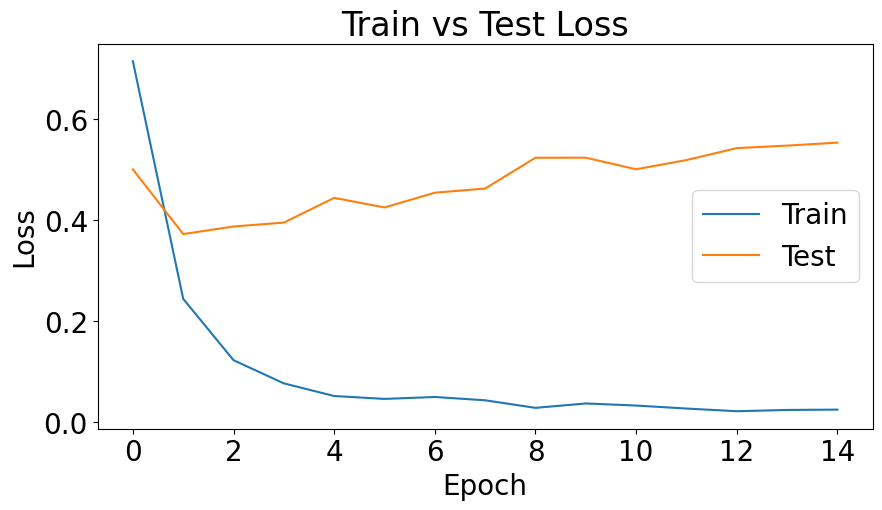

train_loss 0.728 validation_loss 0.45
train_loss 0.232 validation_loss 0.355
train_loss 0.118 validation_loss 0.403
train_loss 0.069 validation_loss 0.35
train_loss 0.053 validation_loss 0.364
train_loss 0.047 validation_loss 0.381
train_loss 0.041 validation_loss 0.402
train_loss 0.041 validation_loss 0.412
train_loss 0.037 validation_loss 0.472
train_loss 0.036 validation_loss 0.52
train_loss 0.031 validation_loss 0.446
train_loss 0.03 validation_loss 0.504
train_loss 0.03 validation_loss 0.465
train_loss 0.026 validation_loss 0.456
train_loss 0.019 validation_loss 0.482


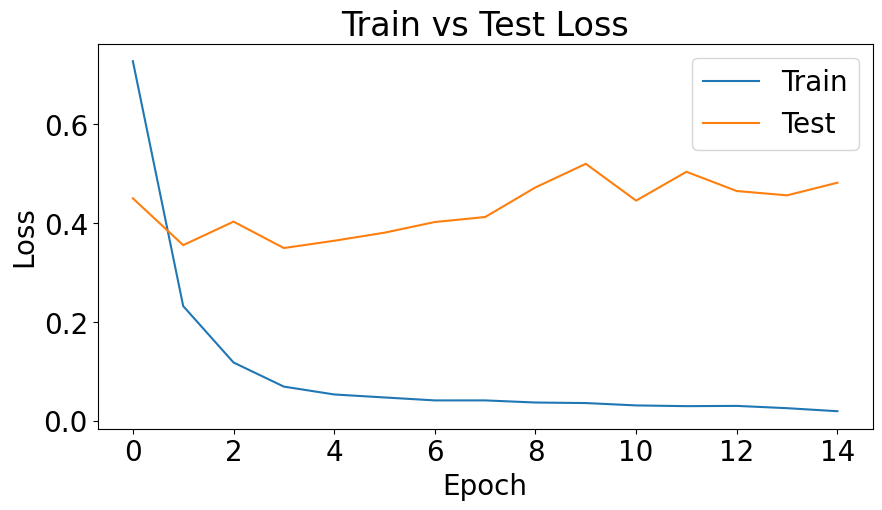

train_loss 0.75 validation_loss 0.489
train_loss 0.24 validation_loss 0.41
train_loss 0.121 validation_loss 0.372
train_loss 0.076 validation_loss 0.345
train_loss 0.057 validation_loss 0.372
train_loss 0.043 validation_loss 0.387
train_loss 0.034 validation_loss 0.404
train_loss 0.04 validation_loss 0.445
train_loss 0.041 validation_loss 0.462
train_loss 0.03 validation_loss 0.493
train_loss 0.031 validation_loss 0.51
train_loss 0.041 validation_loss 0.537
train_loss 0.026 validation_loss 0.47
train_loss 0.025 validation_loss 0.527
train_loss 0.019 validation_loss 0.492


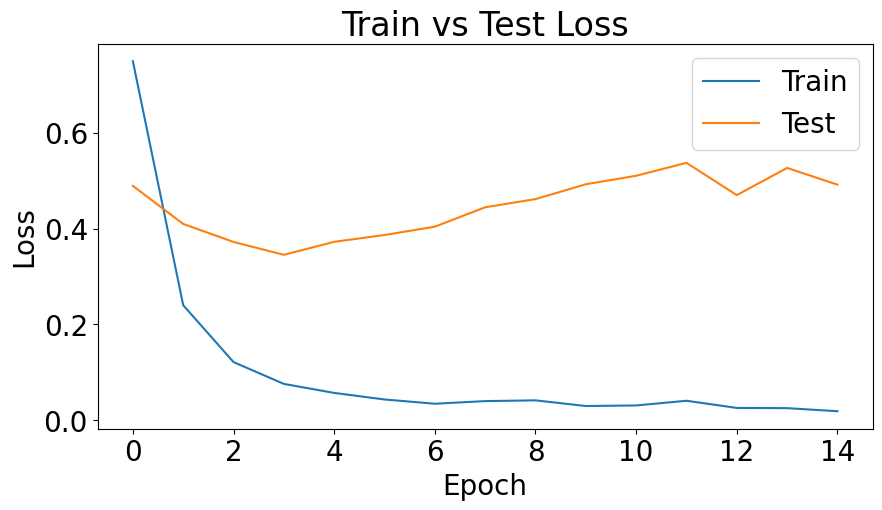

train_loss 0.681 validation_loss 0.495
train_loss 0.266 validation_loss 0.36
train_loss 0.131 validation_loss 0.363
train_loss 0.082 validation_loss 0.368
train_loss 0.067 validation_loss 0.42
train_loss 0.046 validation_loss 0.414
train_loss 0.04 validation_loss 0.432
train_loss 0.054 validation_loss 0.448
train_loss 0.035 validation_loss 0.487
train_loss 0.031 validation_loss 0.47
train_loss 0.031 validation_loss 0.487
train_loss 0.033 validation_loss 0.528
train_loss 0.023 validation_loss 0.541
train_loss 0.021 validation_loss 0.544
train_loss 0.022 validation_loss 0.544


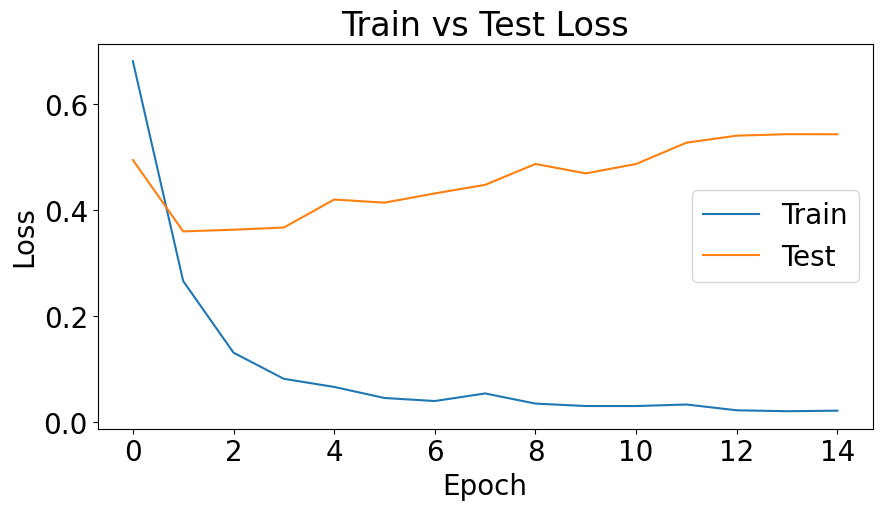

train_loss 0.76 validation_loss 0.633
train_loss 0.291 validation_loss 0.348
train_loss 0.154 validation_loss 0.369
train_loss 0.085 validation_loss 0.355
train_loss 0.058 validation_loss 0.406
train_loss 0.057 validation_loss 0.447
train_loss 0.04 validation_loss 0.42
train_loss 0.042 validation_loss 0.451
train_loss 0.041 validation_loss 0.466
train_loss 0.027 validation_loss 0.48
train_loss 0.034 validation_loss 0.553
train_loss 0.037 validation_loss 0.493
train_loss 0.019 validation_loss 0.468
train_loss 0.021 validation_loss 0.515
train_loss 0.024 validation_loss 0.532


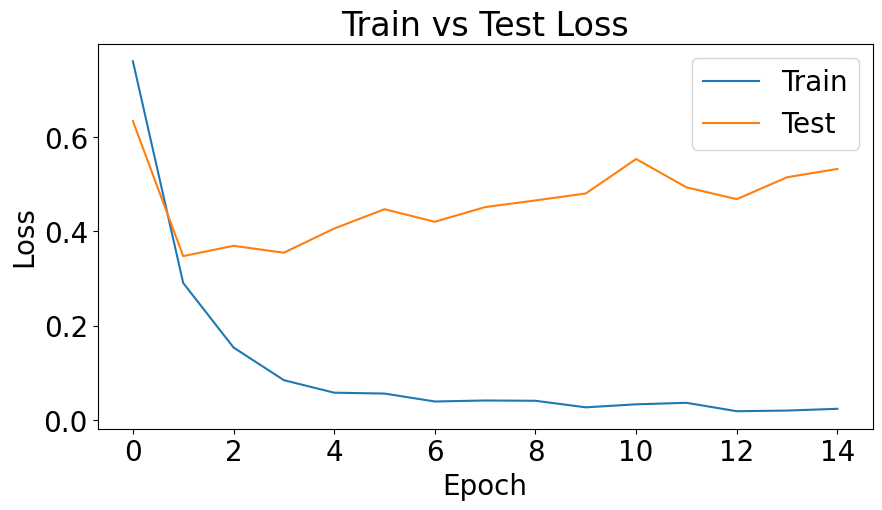

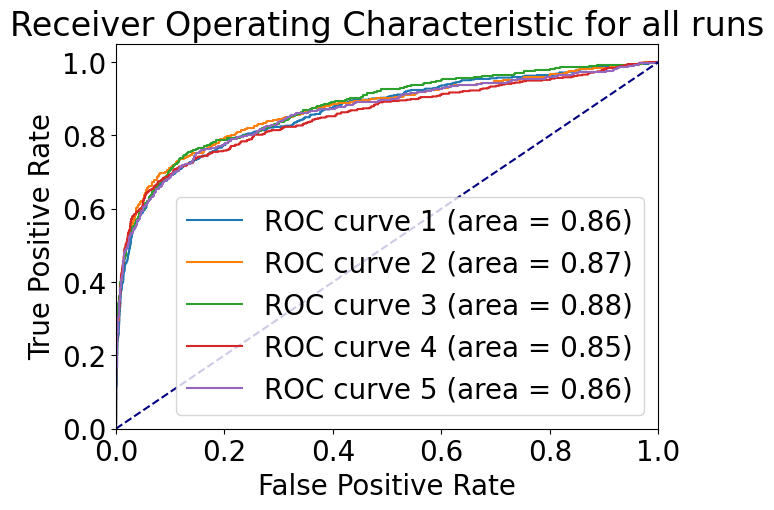

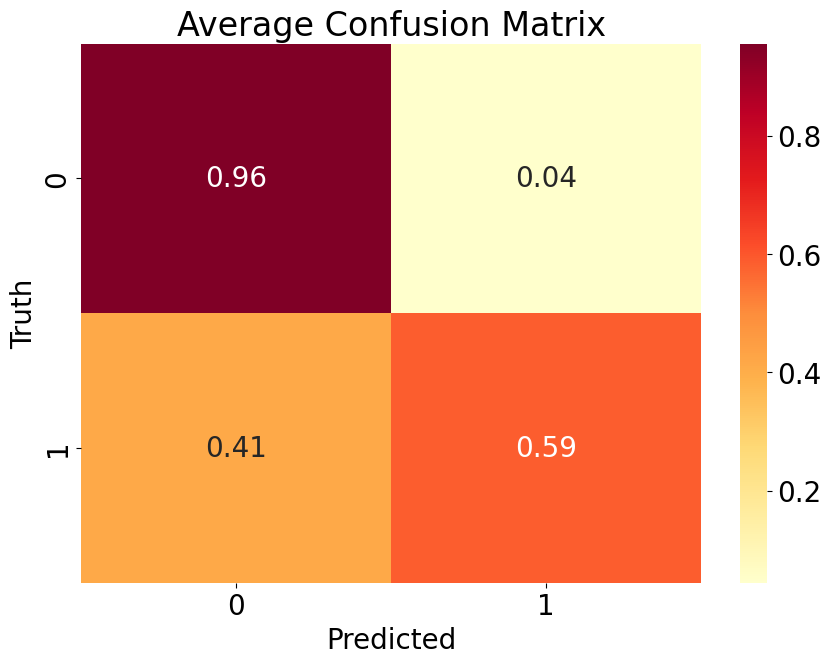

In [119]:
# DPS 
X = []
y = []
from tqdm import tqdm
import numpy as np
for gene_pair, label in tqdm(SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d,e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass
        
for gene_pair, label in tqdm(Non_SR.items()):
    try:       
        a = cds_features_dic[gene_pair[0]]
        b = cds_features_dic[gene_pair[1]]
        c = cds_pro_features_dic[gene_pair[0]]
        d = cds_pro_features_dic[gene_pair[1]]
        e = cds_3d_features_dic[gene_pair[0]]
        f = cds_3d_features_dic[gene_pair[1]]
                
        X.append(np.concatenate([a,b,c,d,e,f]))
        y.append(label)        
    except:
        #print(gene_pair)
        pass

print(len(X))
# Set global font size
plt.rcParams.update({'font.size': 20})

# Combine X and y
data = list(zip(X, y))

# Shuffle data
random.shuffle(data)

# Split data into five parts
n = len(data) // 5
data_splits = [data[i * n:(i + 1) * n] for i in range(5)]

# Save all AUCs and confusion matrices
roc_data = []
cms = []

# For each split, use it as test set and the rest as training set
for i in range(5):
    test_data = data_splits[i]
    train_data = [item for sublist in data_splits[:i] + data_splits[i + 1:] for item in sublist]
    
    # Separate X and y
    X_test, y_test = zip(*test_data)
    X_train, y_train = zip(*train_data)

    # Run the MLP model
    num_train_epochs = 15
    model, train_losses, validation_losses = run_MLP(
        X_train, X_test, y_train, y_test, batch_size=100, 
        learning_rate=1e-4, weight_decay=1e-3, num_train_epochs=num_train_epochs)

    # Plot train and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(num_train_epochs), train_losses, label='Train')
    plt.plot(range(num_train_epochs), validation_losses, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Test Loss')
    plt.show()

    # Predict probabilities for the test data
    probs = model.predict_proba(X_test)

    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cms.append(cm)

# Plot all AUCs
plt.figure(figsize=(7, 5))
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    plt.plot(fpr, tpr, label=f'ROC curve {i+1} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all runs')
plt.legend(loc="lower right")
plt.show()

# Calculate the average confusion matrix
avg_cm = sum(cms) / len(cms)

# Normalize the confusion matrix
cm_normalized = normalize(avg_cm, axis=1, norm='l1')

# Plot confusion matrix using seaborn with warmer colors
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Average Confusion Matrix')
plt.show()        

In [120]:
cms

[array([[5432,  341],
        [ 215,  350]]),
 array([[5643,  164],
        [ 237,  294]]),
 array([[5508,  282],
        [ 219,  329]]),
 array([[5545,  238],
        [ 225,  330]]),
 array([[5533,  255],
        [ 234,  316]])]

In [123]:
# Recall
a= (350)/(215+350)
b= (294)/(237+294)
c= (329)/(219+329)
d= (330)/(215+330)
e= (316)/(234+316)
(a+b+c+d+e)/5

0.5907112696275842

In [124]:
# Precison
# Recall
a= (350)/(341+350)
b= (294)/(164+294)
c= (329)/(282+329)
d= (330)/(238+330)
e= (316)/(255+316)
(a+b+c+d+e)/5

0.5642592427286811